## **Fraudulent Claim Detection**

## Authors:
Parakh Agarwal <br> 
Pallavi Thirtham

## Problem Statement
Global Insure, a leading insurance company, processes thousands of claims annually. However, a significant percentage of these claims turn out to be fraudulent, resulting in considerable financial losses. The company’s current process for identifying fraudulent claims involves manual inspections, which is time-consuming and inefficient. Fraudulent claims are often detected too late in the process, after the company has already paid out significant amounts. Global Insure wants to improve its fraud detection process using data-driven insights to classify claims as fraudulent or legitimate early in the approval process. This would minimise financial losses and optimise the overall claims handling process.

## Business Objective
Global Insure wants to build a model to classify insurance claims as either fraudulent or legitimate based on historical claim details and customer profiles. By using features like claim amounts, customer profiles and claim types, the company aims to predict which claims are likely to be fraudulent before they are approved.


Based on this assignment, you have to answer the following questions:<br>

● How can we analyse historical claim data to detect patterns that indicate fraudulent claims?<br>
● Which features are most predictive of fraudulent behaviour?<br>
● Can we predict the likelihood of fraud for an incoming claim, based on past data?<br>
● What insights can be drawn from the model that can help in improving the fraud detection process?<br>

## Assignment Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Preparation
2. Data Cleaning
3. Train Validation Split 70-30
4. EDA on Training Data
5. EDA on Validation Data (optional)
6. Feature Engineering
7. Model Building
8. Predicting and Model Evaluation

## **1. Data Preparation**
In this step, read the dataset provided in CSV format and look at basic statistics of the data, including preview of data, dimension of data, column descriptions and data types.

### **1.0 Import Libraries**

In [1]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### **1.1 Load the Data**

In [3]:
# Load the dataset
insurance_df = pd.read_csv('insurance_claims.csv')

In [4]:
# Check at the first few entries
insurance_df.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       2014-10-17           OH   
1                 228   42         342868       2006-06-27           IN   
2                 134   29         687698       2000-09-06           OH   
3                 256   41         227811       1990-05-25           IL   
4                 228   44         367455       2014-06-06           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [5]:
# Inspect the shape of the dataset
insurance_df.shape

(1000, 40)

In [6]:
# Inspect the features in the dataset
insurance_df.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  _c39  
count     1000.000000    1000.000000  1000.000000   0.0  
mean      7399.570000   37928.950000  2005.103000   NaN  
std       4824.726179   18886.252893     6.015861   NaN  
min          0.000000      70.000000  1995.000000   NaN  
25%       4445.000000   30292.500000  2000.000000   NaN  
50%       6750.000000   42100.000000  2005.000000   NaN  
75%      10885.000000   50822.500000  2010.000000   NaN  
max      23670.000000   79560.000000  2015.000000   NaN

## **2. Data Cleaning** <font color = red>[10 marks]</font>

### **2.1 Handle null values** <font color = red>[2 marks]</font>

#### **2.1.1** Examine the columns to determine if any value or column needs to be treated <font color="red">[1 Mark]</font>

In [7]:
# Check the number of missing values in each column
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

#### **2.1.2** Handle rows containing null values <font color="red">[1 Mark]</font>

In [8]:
# Handle the rows containing null values
insurance_df['authorities_contacted'].fillna('Not Reported',inplace = True)


### **2.2 Identify and handle redundant values and columns** <font color = red>[5 marks]</font>

#### **2.2.1** Examine the columns to determine if any value or column needs to be treated <font color="red">[2 Mark]</font>

In [9]:
# Write code to display all the columns with their unique values and counts and check for redundant values
for column in insurance_df.columns:
    print(f' No of unique value for column {column} is {insurance_df[column].nunique()}')



 No of unique value for column months_as_customer is 391
 No of unique value for column age is 46
 No of unique value for column policy_number is 1000
 No of unique value for column policy_bind_date is 951
 No of unique value for column policy_state is 3
 No of unique value for column policy_csl is 3
 No of unique value for column policy_deductable is 3
 No of unique value for column policy_annual_premium is 991
 No of unique value for column umbrella_limit is 11
 No of unique value for column insured_zip is 995
 No of unique value for column insured_sex is 2
 No of unique value for column insured_education_level is 7
 No of unique value for column insured_occupation is 14
 No of unique value for column insured_hobbies is 20
 No of unique value for column insured_relationship is 6
 No of unique value for column capital-gains is 338
 No of unique value for column capital-loss is 354
 No of unique value for column incident_date is 60
 No of unique value for column incident_type is 4
 No 

In [10]:
for column in ['insured_education_level','insured_occupation','policy_state','insured_hobbies','insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted','property_damage','bodily_injuries','police_report_available']:
    print(f'Column {column}')
    print(f'Column unique values is {insurance_df[column].unique()}')
    print('**************************')
    

Column insured_education_level
Column unique values is ['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
**************************
Column insured_occupation
Column unique values is ['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
**************************
Column policy_state
Column unique values is ['OH' 'IN' 'IL']
**************************
Column insured_hobbies
Column unique values is ['sleeping' 'reading' 'board-games' 'bungie-jumping' 'base-jumping' 'golf'
 'camping' 'dancing' 'skydiving' 'movies' 'hiking' 'yachting' 'paintball'
 'chess' 'kayaking' 'polo' 'basketball' 'video-games' 'cross-fit'
 'exercise']
**************************
Column insured_relationship
Column unique values is ['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']
**********************

In [11]:
print(insurance_df.groupby('property_damage')['fraud_reported'].count())
print(insurance_df.groupby('police_report_available')['fraud_reported'].count())
print(insurance_df.groupby('collision_type')['fraud_reported'].count())

property_damage
?      360
NO     338
YES    302
Name: fraud_reported, dtype: int64
police_report_available
?      343
NO     343
YES    314
Name: fraud_reported, dtype: int64
collision_type
?                  178
Front Collision    254
Rear Collision     292
Side Collision     276
Name: fraud_reported, dtype: int64


In [12]:
insurance_df['property_damage'] = insurance_df['property_damage'].map({'YES':'Y','NO':'N','?':'Unknown'})
insurance_df['police_report_available'] = insurance_df['police_report_available'].map({'YES':'Y','NO':'N','?':'Unknown'})
insurance_df['collision_type'] = insurance_df['collision_type'].str.replace('?','Unknown')

#### **2.2.2** Identify and drop any columns that are completely empty <font color="red">[1 Mark]</font>

In [13]:
# Identify and drop any columns that are completely empty
insurance_df = insurance_df.dropna(axis=1,how='all')
insurance_df

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       2014-10-17           OH   
1                   228   42         342868       2006-06-27           IN   
2                   134   29         687698       2000-09-06           OH   
3                   256   41         227811       1990-05-25           IL   
4                   228   44         367455       2014-06-06           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       1991-07-16           OH   
996                 285   41         186934       2014-01-05           IL   
997                 130   34         918516       2003-02-17           OH   
998                 458   62         533940       2011-11-18           IL   
999                 456   60         556080       1996-11-11           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... witnesses police_report_available total_claim_amount  \
0         466132  ...         2                       Y              71610   
1         468176  ...         0                 Unknown               5070   
2         430632  ...         3                       N              34650   
3         608117  ...         2                       N              63400   
4         610706  ...         1                       N               6500   
..           ...  ...       ...                     ...                ...   
995       431289  ...         1                 Unknown              87200   
996       608177  ...         3                 Unknown             108480   
997       442797  ...         3                       Y              67500   
998       441714  ...         1                       Y              46980   
999       612260  ...         3                 Unknown               5060   

    injury_claim property_claim  vehicle_claim   auto_make auto_model  \
0           6510          13020          52080        Saab        92x   
1            780            780           3510    Mercedes       E400   
2           7700           3850          23100       Dodge        RAM   
3           6340           6340          50720   Chevrolet      Tahoe   
4           1300            650           4550      Accura        RSX   
..           ...            ...            ...         ...        ...   
995        17440           8720          61040       Honda     Accord   
996        18080          18080          72320  Volkswagen     Passat   
997         7500           7500          52500      Suburu    Impreza   
998         5220           5220          36540        Audi         A5   
999          460            920           3680    Mercedes       E400   

    auto_year fraud_reported  
0        2004              Y  
1        2007              Y  
2        2007              N  
3        2014              Y  
4        2009              N  
..        ...            ...  
995      2006              N  
996      2015              N  
997      1996              N  
998      1998              N  
999      200

#### **2.2.3** Identify and drop rows where features have illogical or invalid values, such as negative values for features that should only have positive values <font color="red">[1 Mark]</font>

In [14]:
# Identify and drop rows where features have illogical or invalid values, such as negative values for features that should only have positive values
insurance_df.describe()
insurance_df['umbrella_limit'].unique()
insurance_df = insurance_df[insurance_df['umbrella_limit']>=0]
insurance_df['umbrella_limit'].unique()
insurance_df.shape

(999, 39)

#### **2.2.4** Identify and remove columns where a large proportion of the values are unique or near-unique, as these columns are likely to be identifiers or have very limited predictive power <font color="red">[1 Mark]</font>

In [15]:
# Identify and remove columns that are likely to be identifiers or have very limited predictive power

insurance_df.drop('policy_number',axis=1,inplace=True)
insurance_df.drop('policy_bind_date',axis=1,inplace=True)
insurance_df.drop('insured_zip',axis=1,inplace=True)
insurance_df.drop('incident_location',axis=1,inplace=True)

In [16]:
# Check the dataset
insurance_df.nunique()
#insurance_df

months_as_customer             391
age                             46
policy_state                     3
policy_csl                       3
policy_deductable                3
policy_annual_premium          990
umbrella_limit                  10
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_hobbies                 20
insured_relationship             6
capital-gains                  338
capital-loss                   354
incident_date                   60
incident_type                    4
collision_type                   4
incident_severity                4
authorities_contacted            5
incident_state                   7
incident_city                    7
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage                  3
bodily_injuries                  3
witnesses                        4
police_report_available          3
total_claim_amount             762
injury_claim        

### **2.3 Fix Data Types** <font color = red>[3 marks]</font>
Carefully examine the dataset and identify columns that contain date or time information but are not stored as the appropriate data type. Convert these columns to the correct datetime data type to enable proper analysis and manipulation of temporal information.

In [17]:
# Fix the data types of the columns with incorrect data types
insurance_df['incident_date'] = pd.to_datetime(insurance_df['incident_date'])

In [18]:
# Check the features of the data again
insurance_df['incident_date']

0     2015-01-25
1     2015-01-21
2     2015-02-22
3     2015-01-10
4     2015-02-17
         ...    
995   2015-02-22
996   2015-01-24
997   2015-01-23
998   2015-02-26
999   2015-02-26
Name: incident_date, Length: 999, dtype: datetime64[ns]

## **3. Train-Validation Split** <font color = red>[5 marks]</font>

### **3.1 Import required libraries**  

In [19]:
# Import train-test-split
from sklearn.model_selection import train_test_split

### **3.2 Define feature and target variables** <font color = red>[2 Marks]</font>

In [20]:
# Put all the feature variables in X
X = insurance_df.drop('fraud_reported',axis =1)
# Put the target variable in y
y = insurance_df['fraud_reported']

y.shape

(999,)

In [21]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           999 non-null    int64         
 1   age                          999 non-null    int64         
 2   policy_state                 999 non-null    object        
 3   policy_csl                   999 non-null    object        
 4   policy_deductable            999 non-null    int64         
 5   policy_annual_premium        999 non-null    float64       
 6   umbrella_limit               999 non-null    int64         
 7   insured_sex                  999 non-null    object        
 8   insured_education_level      999 non-null    object        
 9   insured_occupation           999 non-null    object        
 10  insured_hobbies              999 non-null    object        
 11  insured_relationship         999 non-null    objec

### **3.3 Split the data** <font color="red">[3 Marks]</font>

In [22]:
# Split the dataset into 70% train and 30% validation and use stratification on the target variable
X_train ,X_test, y_train , y_test = train_test_split(X,y,train_size = 0.7 , stratify = y, test_size = 0.3 , random_state = 42)


# Reset index for all train and test sets
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)


## **4. EDA on training data** <font color = red>[20 marks]</font>

### **4.1 Perform univariate analysis** <font color = red>[5 marks]</font>

#### **4.1.1** Identify and select numerical columns from training data for univariate analysis <font color = "red">[1 Mark]</font>

In [23]:
# Select numerical columns
numerical_df = insurance_df.select_dtypes(include=['number'])

#### **4.1.2** Visualise the distribution of selected numerical features using appropriate plots to understand their characteristics <font color = "red">[4 Marks]</font>

In [24]:
#importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

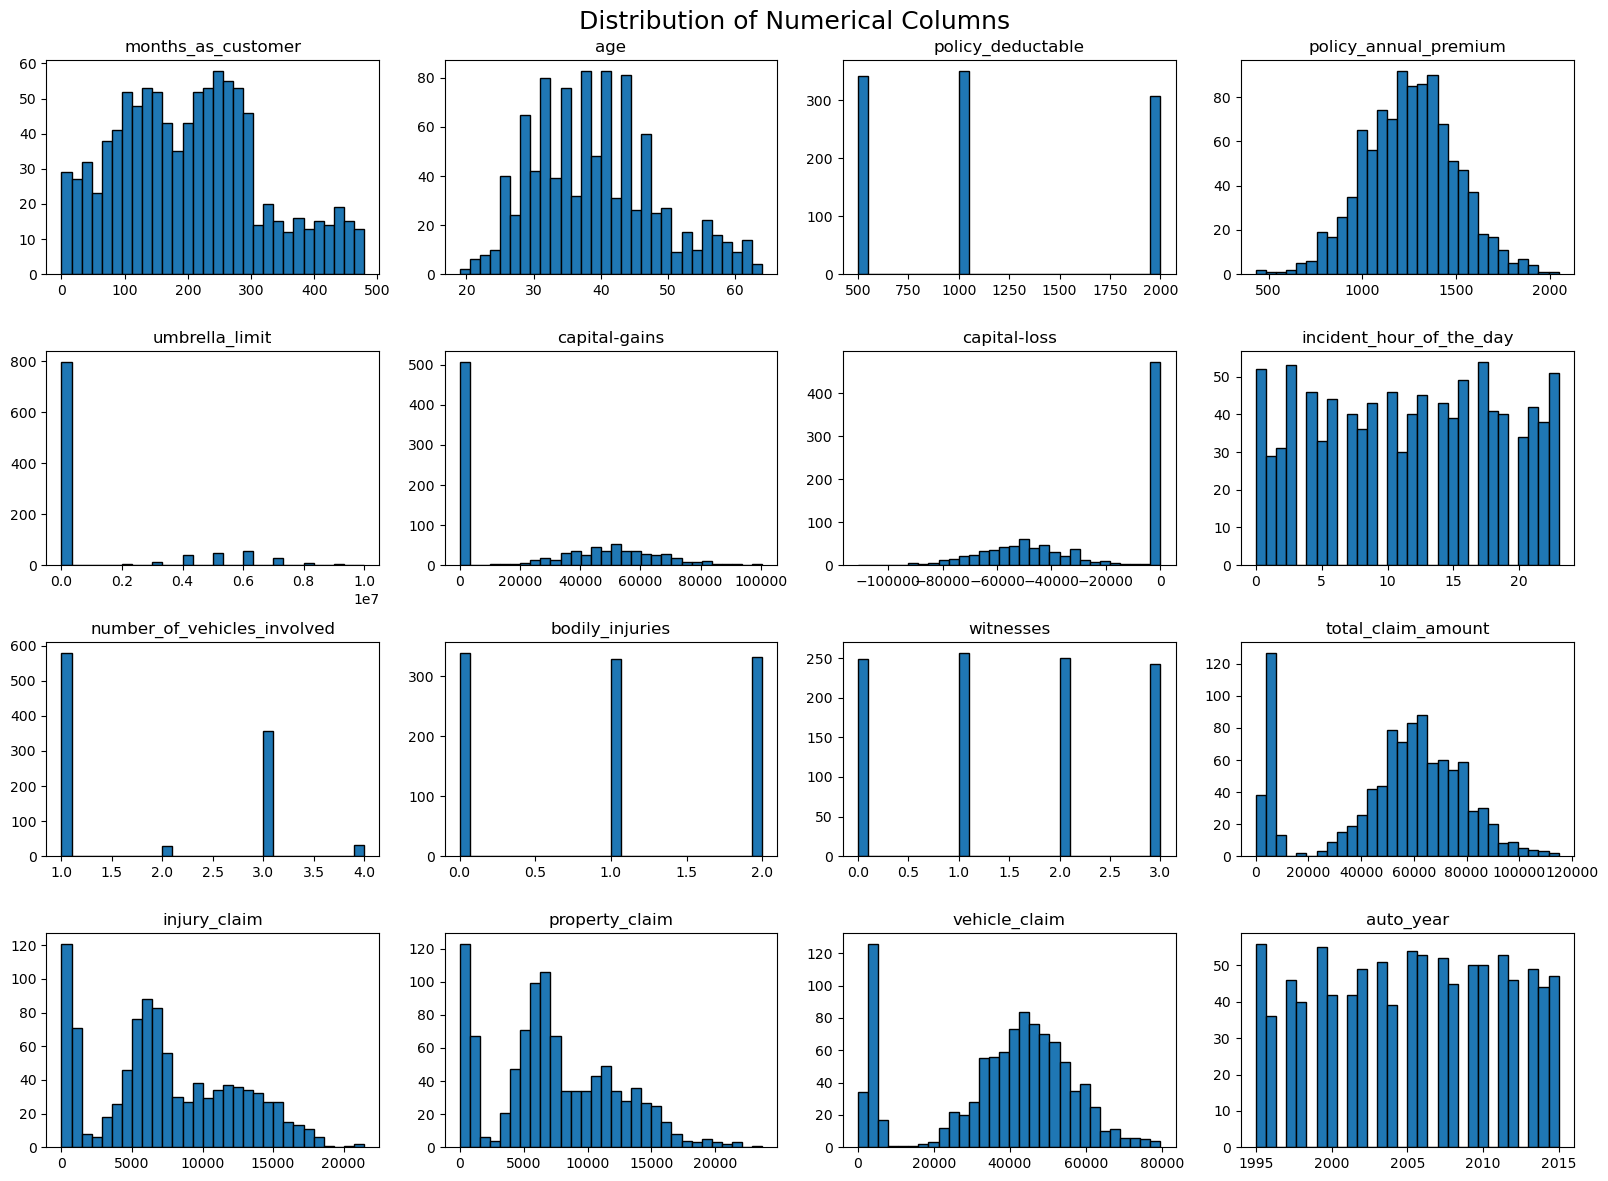

In [25]:
# Plot all the numerical columns to understand their distribution
#Histogram
numerical_df.hist(
    bins=30,
    figsize=(16, 12),
    edgecolor='black',
    grid=False
)

plt.suptitle('Distribution of Numerical Columns', fontsize=18)
plt.tight_layout()
plt.show()

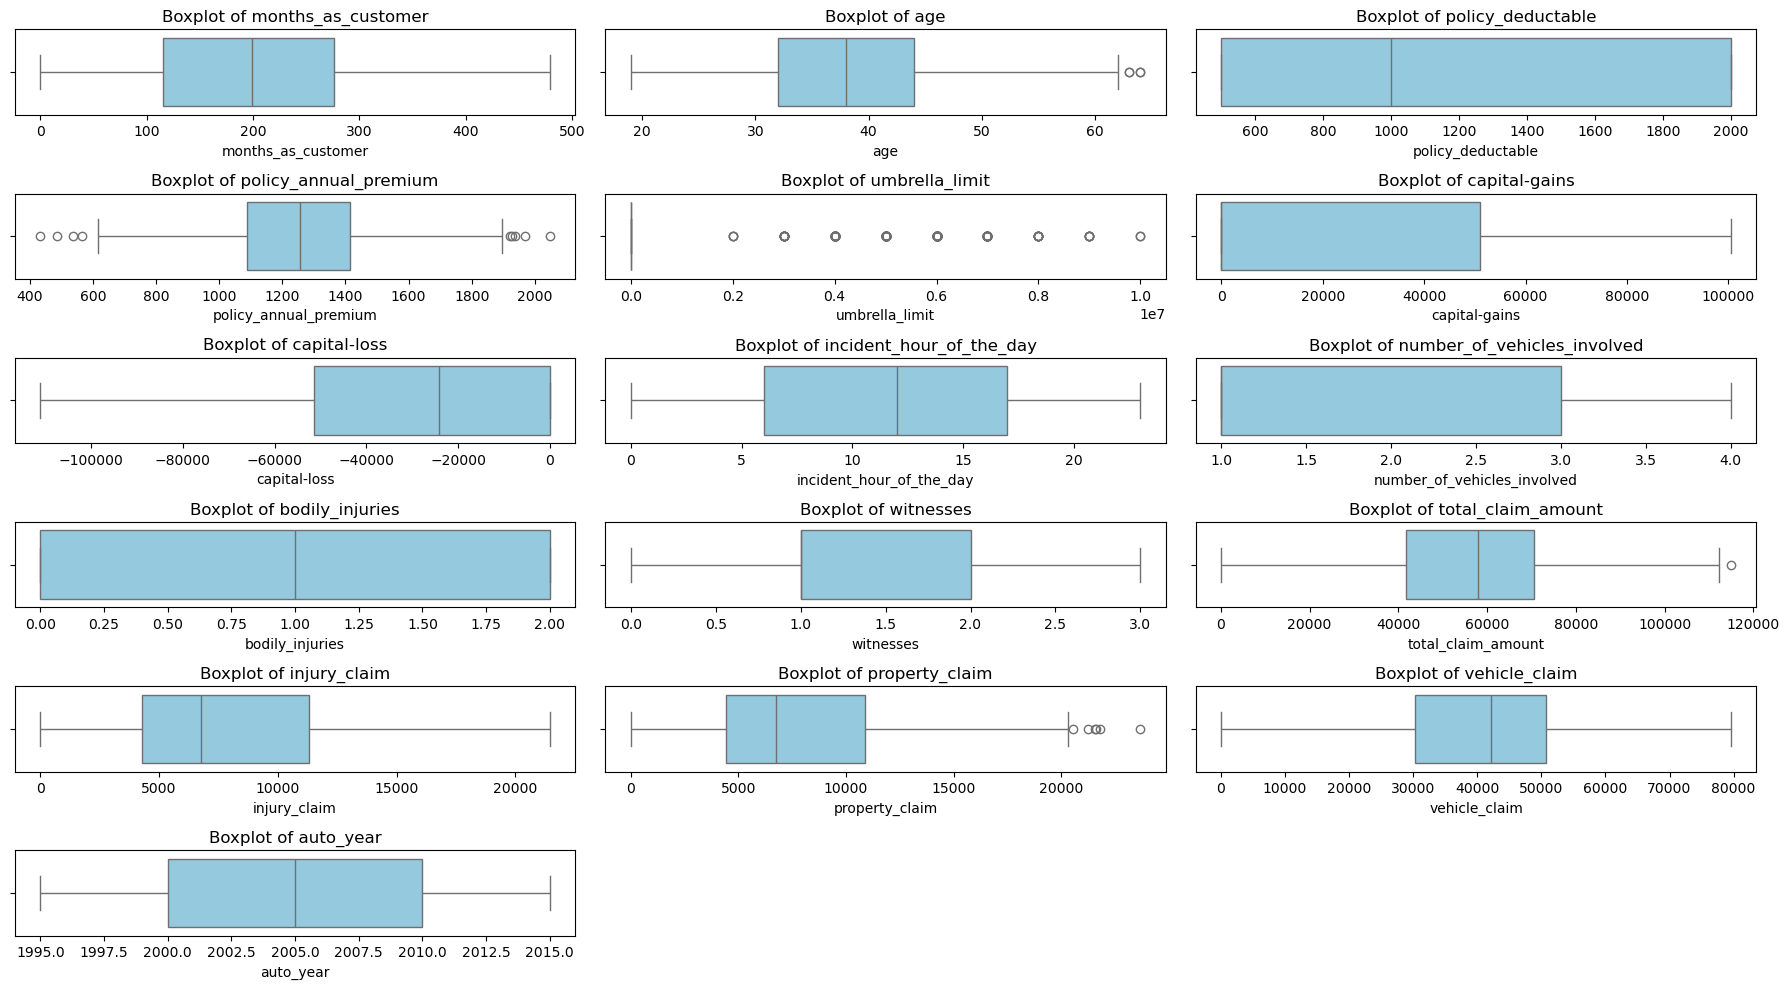

In [26]:
#Box plot

plt.figure(figsize=(18, 10))

for i, col in enumerate(numerical_df.columns, 1):
    plt.subplot((len(numerical_df.columns) - 1) // 3 + 1, 3, i)
    sns.boxplot(x=insurance_df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

### **4.2 Perform correlation analysis** <font color="red">[3 Marks]</font>

 Investigate the relationships between numerical features to identify potential multicollinearity or dependencies. Visualise the correlation structure using an appropriate method to gain insights into feature relationships.

In [27]:
# Create correlation matrix for numerical columns
corr_matrix = numerical_df.corr()

# Plot Heatmap of the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr_matrix,
    annot=True,         # shows correlation values
    fmt=".2f",          # formats the numbers
    cmap="coolwarm",    # color map (red-blue)
    center=0,           # center the colormap at 0
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Matrix Heatmap for Numerical Features", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### **4.3 Check class balance** <font color="red">[2 Marks]</font>

Examine the distribution of the target variable to identify potential class imbalances using visualisation for better understanding.

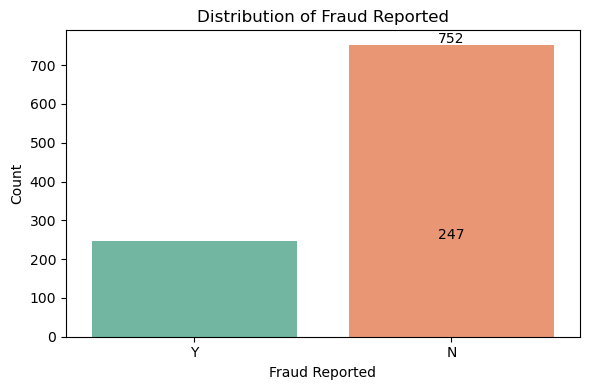

In [28]:
# Plot a bar chart to check class balance

plt.figure(figsize=(6, 4))
sns.countplot(data=insurance_df, x='fraud_reported', palette='Set2')

for count in insurance_df['fraud_reported'].value_counts().values:
    plt.text(x=count / count, y=count + 5, s=count, ha='center')

plt.title('Distribution of Fraud Reported')
plt.xlabel('Fraud Reported')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### **4.4 Perform bivariate analysis** <font color="red">[10 Marks]</font>

#### **4.4.1** Target likelihood analysis for categorical variables. <font color="red">[5 Marks]</font>
Investigate the relationships between categorical features and the target variable by analysing the target event likelihood (for the `'Y'` event) for each level of every relevant categorical feature. Through this analysis, identify categorical features that do not contribute much in explaining the variation in the target variable.

In [29]:

def analyze_target_likelihood(df):
    """
    Analyze the likelihood of fraud (target = 'Y') for each category of categorical features.

    Parameters:
    df : pandas.DataFrame
        The full DataFrame with 'fraud_reported' as the target column.

    Returns:
    summary_df : pandas.DataFrame
        A summary table containing fraud likelihood for each category.
    """

    # Step 1: Convert target column to binary
    df = df.copy()
    df['fraud_binary'] = df['fraud_reported'].map({'Y': 1, 'N': 0})

    # Step 2: Identify categorical features (excluding 'fraud_reported')
    categorical_cols = df.select_dtypes(include='object').columns.drop('fraud_reported')

    # Step 3: Collect results
    all_results = []

    for col in categorical_cols:
        # Group by category and calculate fraud likelihood and counts
        likelihood_df = (
            df.groupby(col)['fraud_binary']
            .agg(fraud_likelihood='mean', count='count')
            .reset_index()
        )
        likelihood_df['feature'] = col

        # Store for final summary
        all_results.append(likelihood_df)

        # Plot the fraud likelihood
        plt.figure(figsize=(8, 4))
        sns.barplot(data=likelihood_df, x=col, y='fraud_likelihood', palette='Set2')
        plt.title(f"Fraud Likelihood by '{col}'", fontsize=14)
        plt.ylabel("P(Fraud = 'Y')")
        plt.xlabel(col)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    # Step 4: Combine all results into a single summary table
    summary_df = pd.concat(all_results, ignore_index=True)

    return summary_df


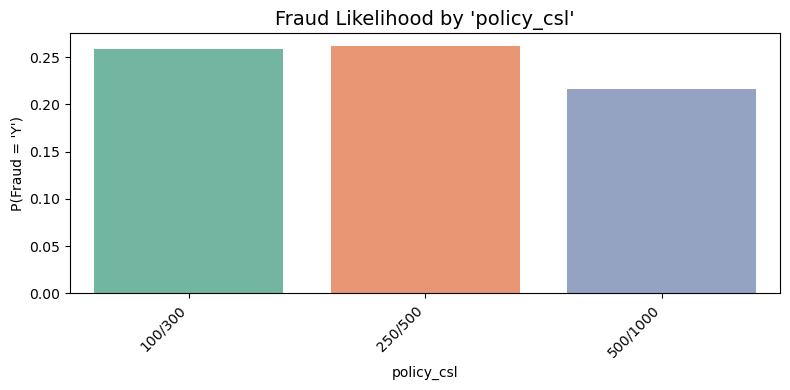

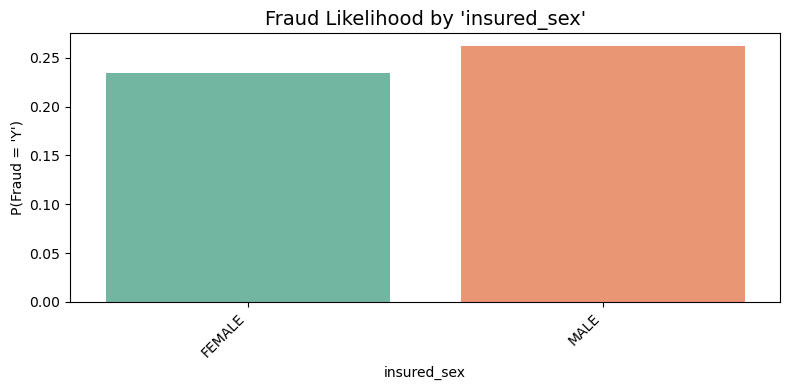

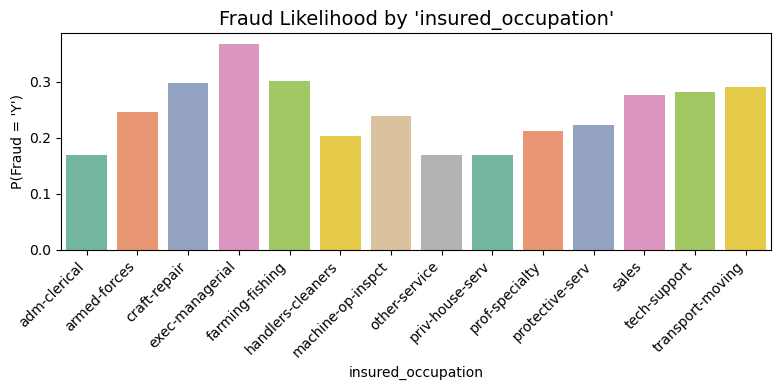

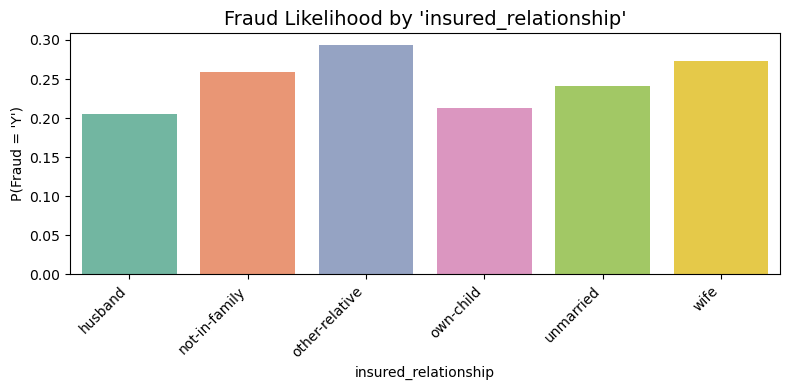

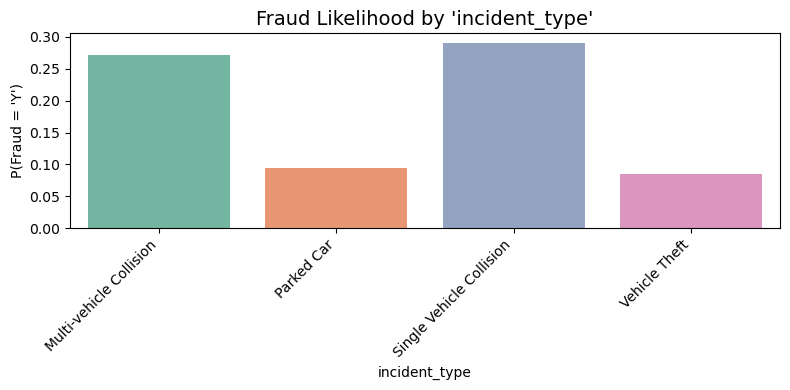

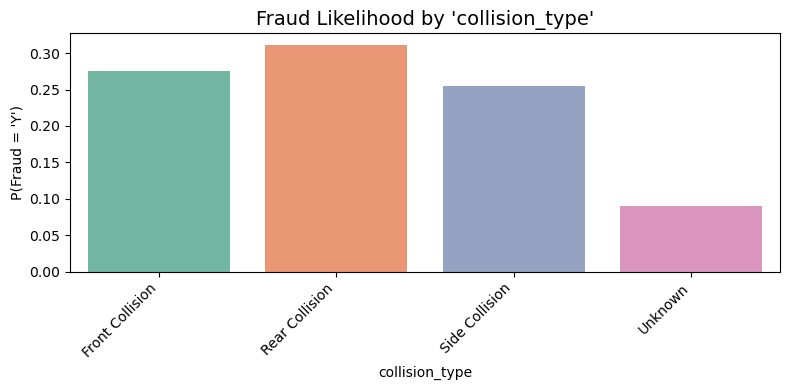

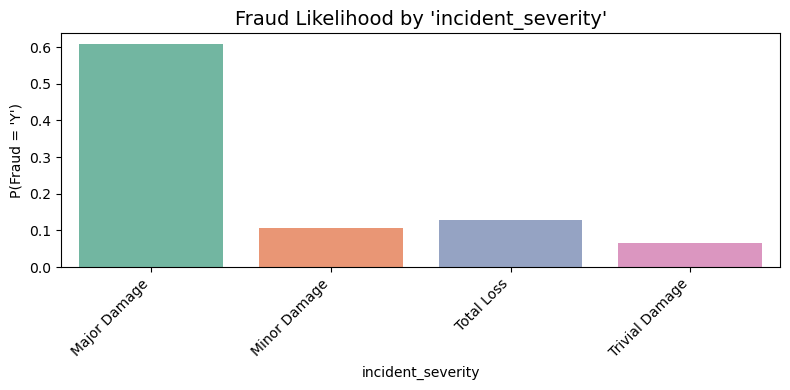

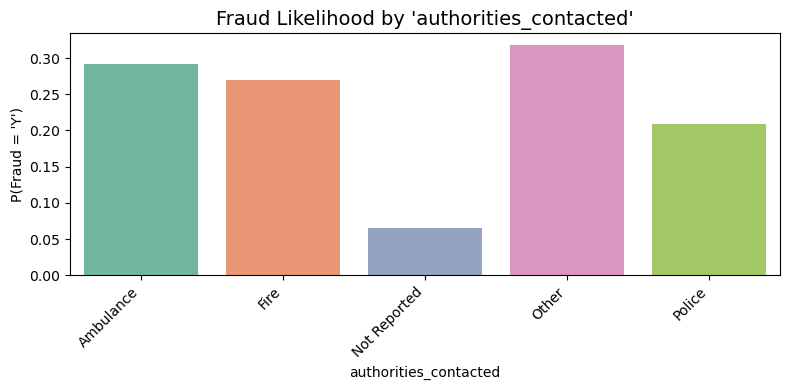

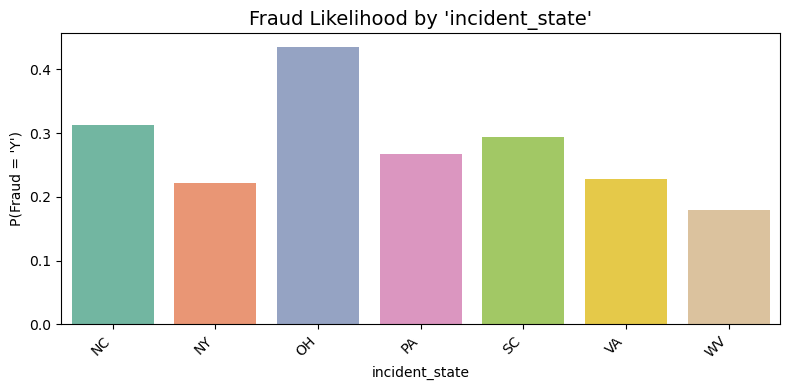

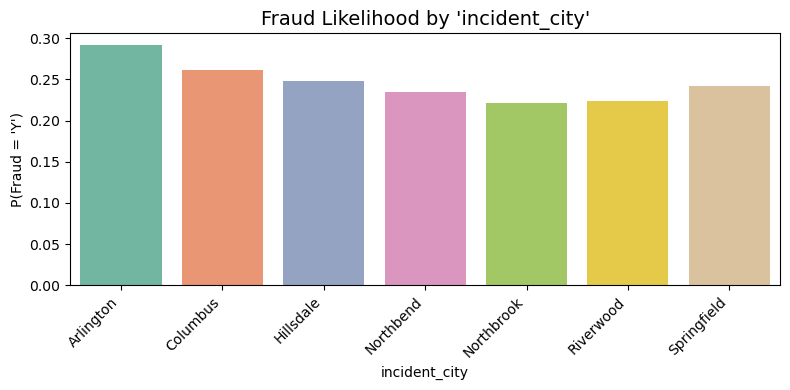

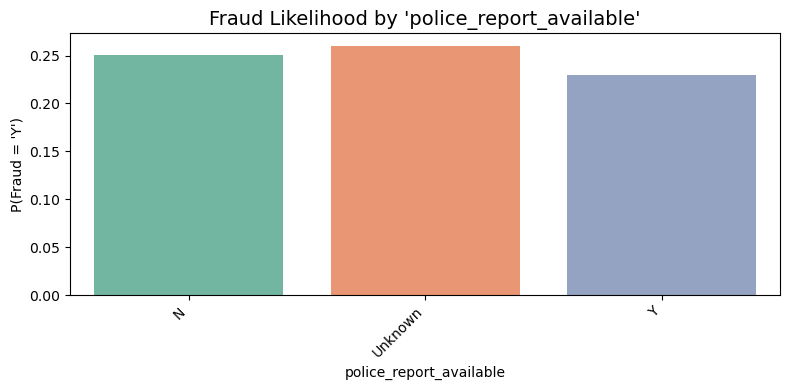

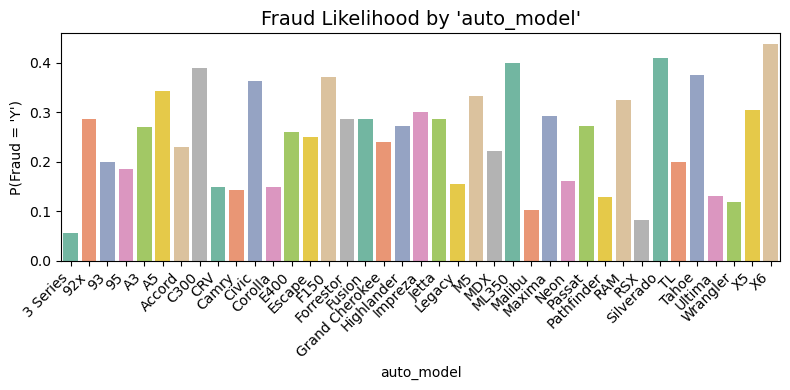

policy_state  fraud_likelihood  count       feature policy_csl insured_sex  \
0           IL          0.227811    338  policy_state        NaN         NaN   
1           IN          0.254839    310  policy_state        NaN         NaN   
2           OH          0.259259    351  policy_state        NaN         NaN   
3          NaN          0.258621    348    policy_csl    100/300         NaN   
4          NaN          0.262108    351    policy_csl    250/500         NaN   

  insured_education_level insured_occupation insured_hobbies  \
0                     NaN                NaN             NaN   
1                     NaN                NaN             NaN   
2                     NaN                NaN             NaN   
3                     NaN                NaN             NaN   
4                     NaN                NaN             NaN   

  insured_relationship incident_type collision_type incident_severity  \
0                  NaN           NaN            NaN               NaN   
1                  NaN           NaN            NaN               NaN   
2                  NaN           NaN            NaN               NaN   
3                  NaN           NaN            NaN               NaN   
4                  NaN           NaN            NaN               NaN   

  authorities_contacted incident_state incident_city property_damage  \
0                   NaN            NaN           NaN             NaN   
1                   NaN            NaN           NaN             NaN   
2                   NaN            NaN           NaN             NaN   
3                   NaN            NaN           NaN             NaN   
4                   NaN            NaN           NaN             NaN   

  police_report_available auto_make auto_model  
0                     NaN       NaN        NaN  
1                     NaN       NaN        NaN  
2                     NaN       NaN        NaN  
3                     NaN       NaN        NaN  
4                     NaN       NaN        NaN

In [30]:
summary = analyze_target_likelihood(insurance_df)
summary.head()

#### **4.4.2** Explore the relationships between numerical features and the target variable to understand their impact on the target outcome using appropriate visualisation techniques to identify trends and potential interactions. <font color="red">[5 Marks]</font>

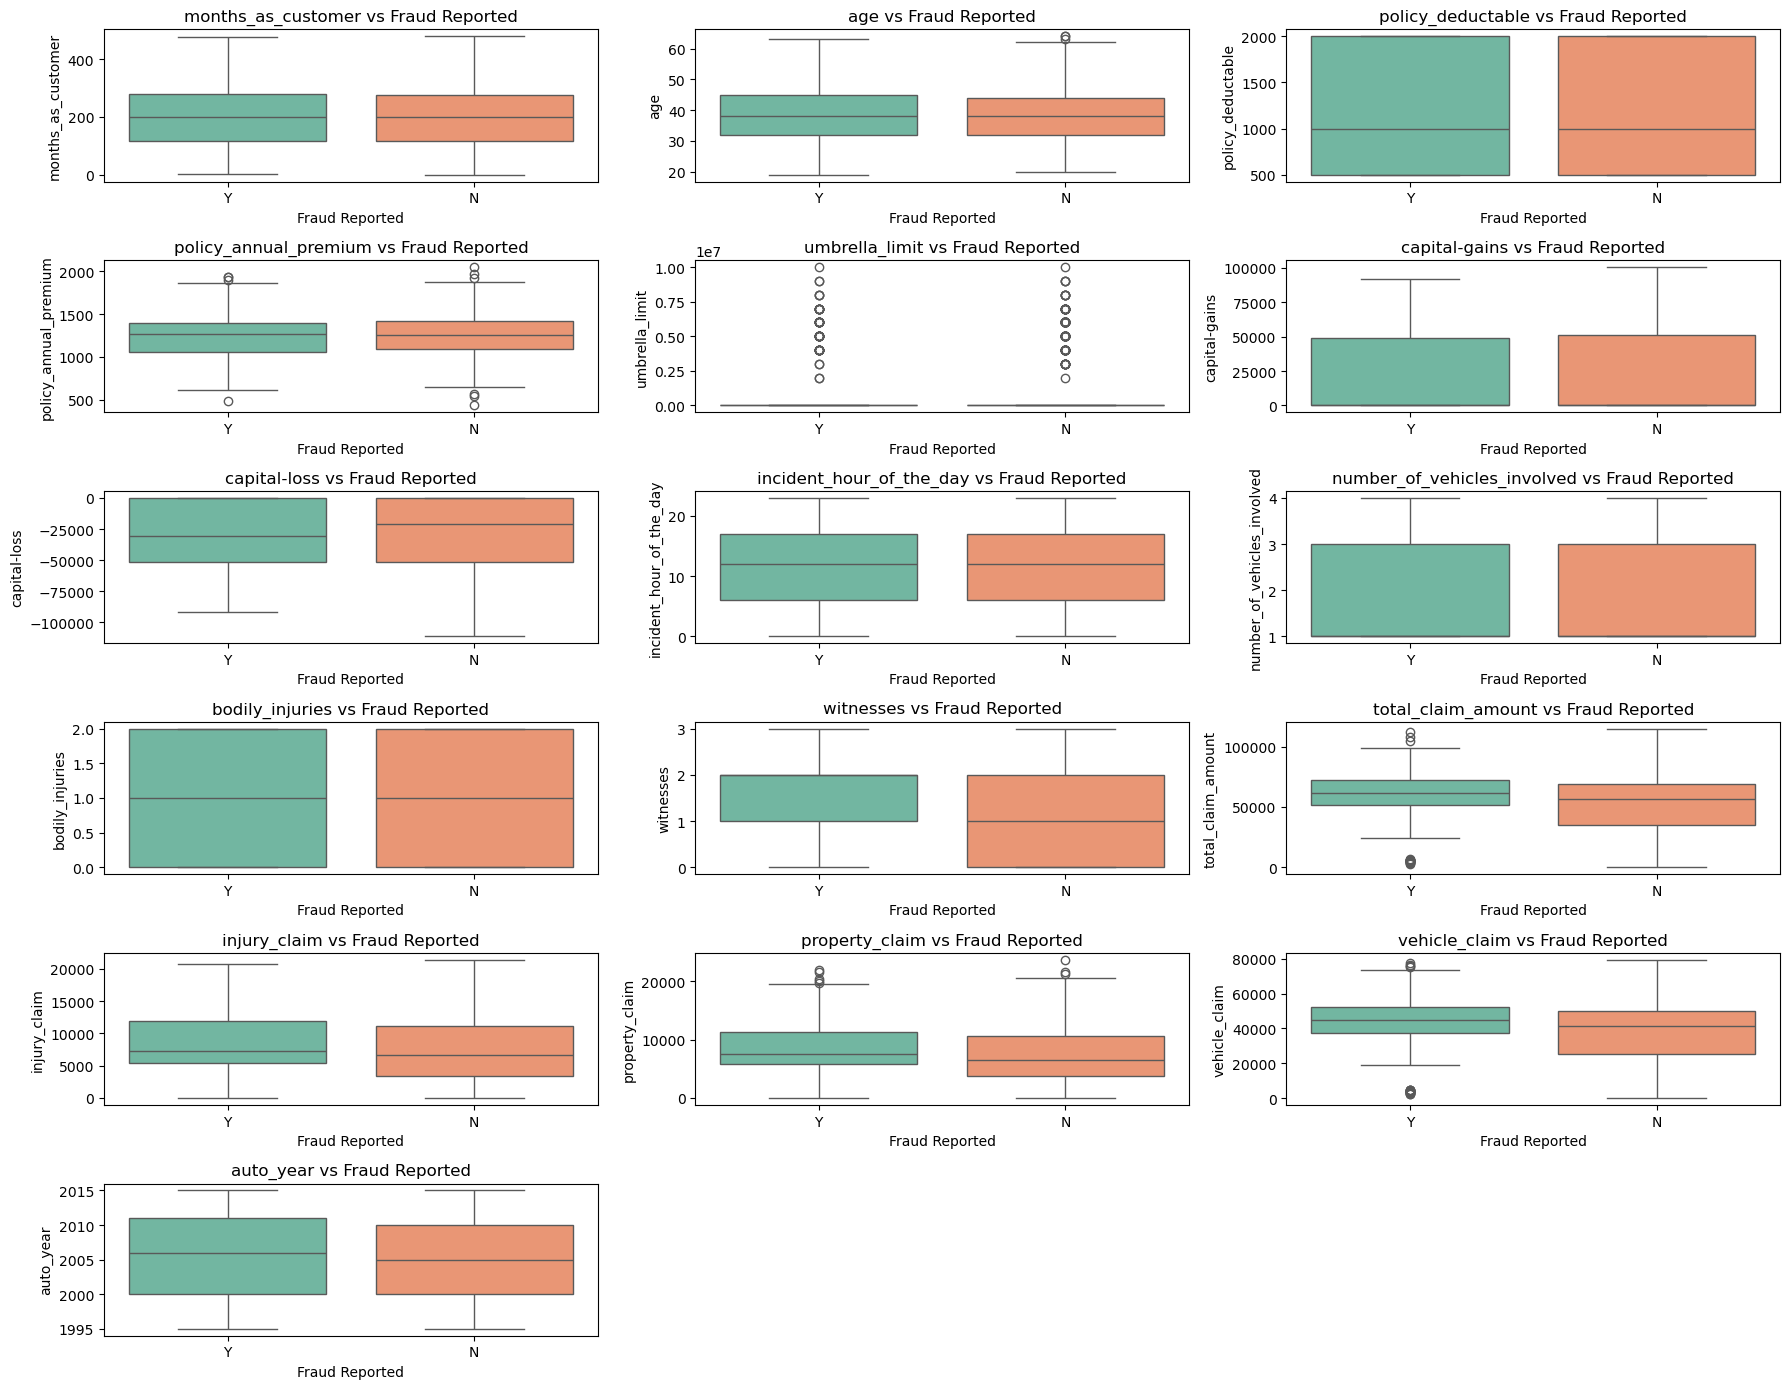

In [31]:
# Select numerical columns
numerical_cols = insurance_df.select_dtypes(include='number').columns

# Set up plot grid
plt.figure(figsize=(18, 14))

# Loop through each numerical feature and plot
for i, col in enumerate(numerical_cols, 1):
    plt.subplot((len(numerical_cols)-1)//3 + 1, 3, i)
    sns.boxplot(x='fraud_reported', y=col, data=insurance_df, palette='Set2')
    plt.title(f'{col} vs Fraud Reported')
    plt.xlabel('Fraud Reported')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


## **5. EDA on validation data** <font color = red>[OPTIONAL]</font>

### **5.1 Perform univariate analysis**

#### **5.1.1** Identify and select numerical columns from training data for univariate analysis.

In [32]:
# Select numerical columns
print(X_test.columns)
numerical_columns = ['months_as_customer','age','policy_deductable','policy_annual_premium',
                     'umbrella_limit','capital-gains','capital-loss','incident_hour_of_the_day',
                     'number_of_vehicles_involved','total_claim_amount','injury_claim','property_claim','vehicle_claim']




Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_date', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year'],
      dtype='object')


#### **5.1.2** Visualise the distribution of selected numerical features using appropriate plots to understand their characteristics.

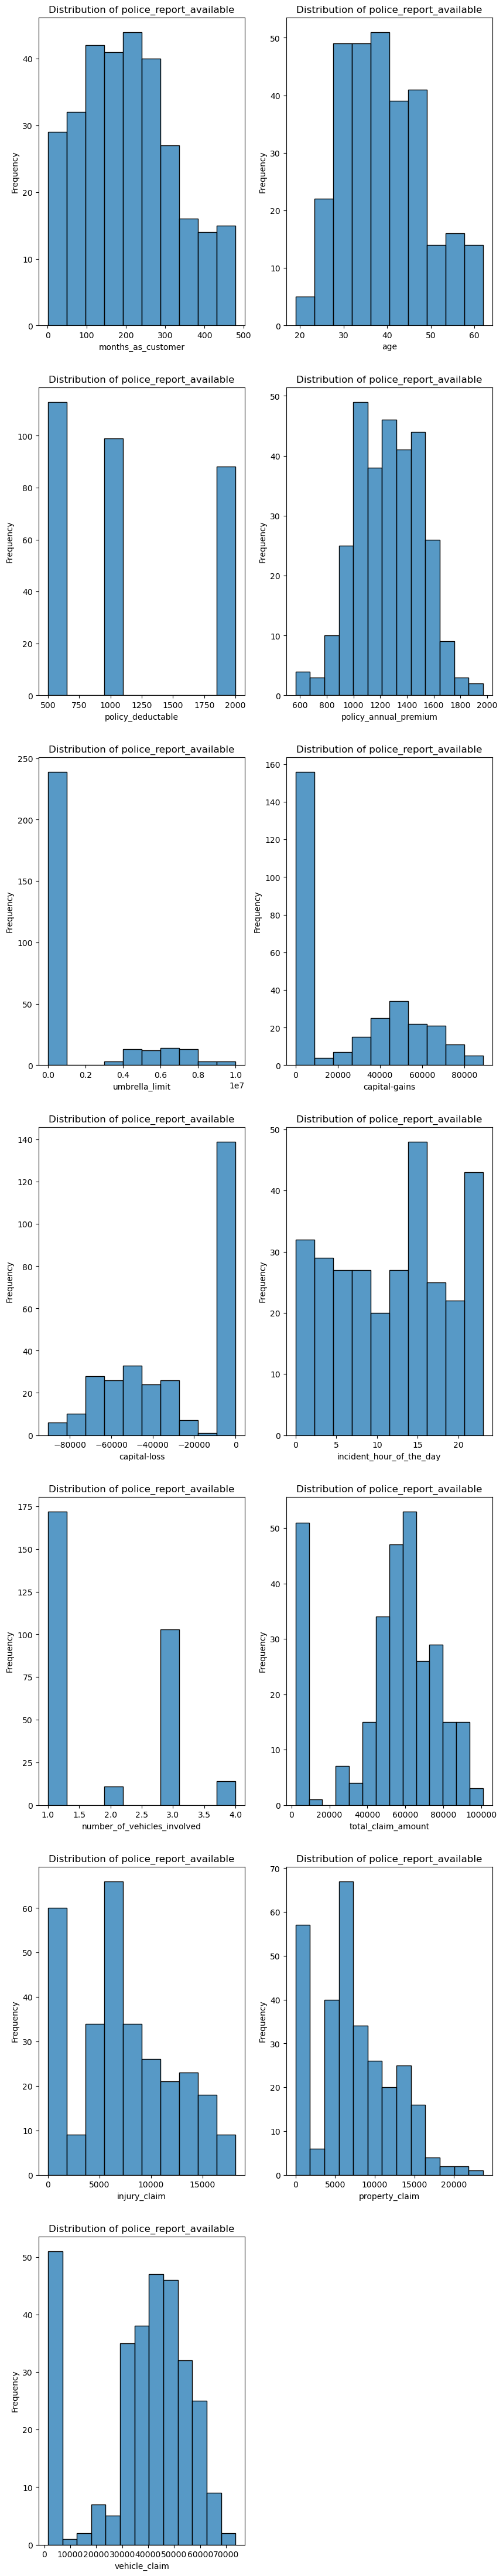

In [33]:
# Plot all the numerical columns to understand their distribution
n_column = 2
n_rows = (len(numerical_columns)+1)//2
fig, axes = plt.subplots(n_rows, n_column, figsize=(10, n_rows * 8))

axes = axes.flatten()  # This flattens the 2D array to 1D



for i,col in enumerate(numerical_columns):
    sns.histplot(X_test[col],ax = axes[i], palette='Set2')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    
plt.show()


In [34]:
n_rows = (len(numerical_columns)+1)//2
fig, axes = plt.subplots(n_rows, 2, figsize=(14, 4 * n_rows))
axes = axes.flatten()  
for i, col in enumerate(numerical_columns):
        sns.boxplot(x=X_test[col], ax=axes[i])
        axes[i].set_title(f'Box Plot of {col}')
        axes[i].set_xlabel(col)
plt.tight_layout()  # Adjust the layout
plt.show()

### **5.2 Perform correlation analysis**

 Investigate the relationships between numerical features to identify potential multicollinearity or dependencies. Visualise the correlation structure using an appropriate method to gain insights into feature relationships.

In [35]:
# Create correlation matrix for numerical columns
corr_matrix  = X_test[numerical_columns].corr()

# Plot Heatmap of the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True)

<Axes: >

### **5.3 Check class balance**

Examine the distribution of the target variable to identify potential class imbalances. Visualise the distribution for better understanding.

Index(['N', 'Y'], dtype='object', name='fraud_reported')


<Axes: xlabel='fraud_reported', ylabel='count'>

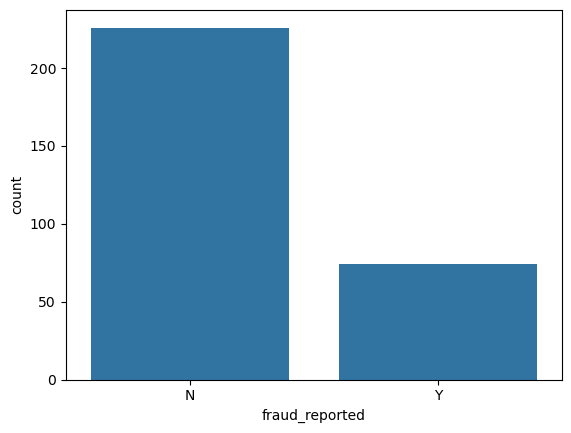

In [36]:
# Plot a bar chart to check class balance
print(y_test.value_counts().index)
sns.barplot(x=y_test.value_counts().index,y = y_test.value_counts())

### **5.4 Perform bivariate analysis**

#### **5.4.1** Target likelihood analysis for categorical variables.
Investigate the relationships between categorical features and the target variable by analysing the target event likelihood (for the `'Y'` event) for each level of every relevant categorical feature. Through this analysis, identify categorical features that do not contribute much in explaining the variation in the target variable.

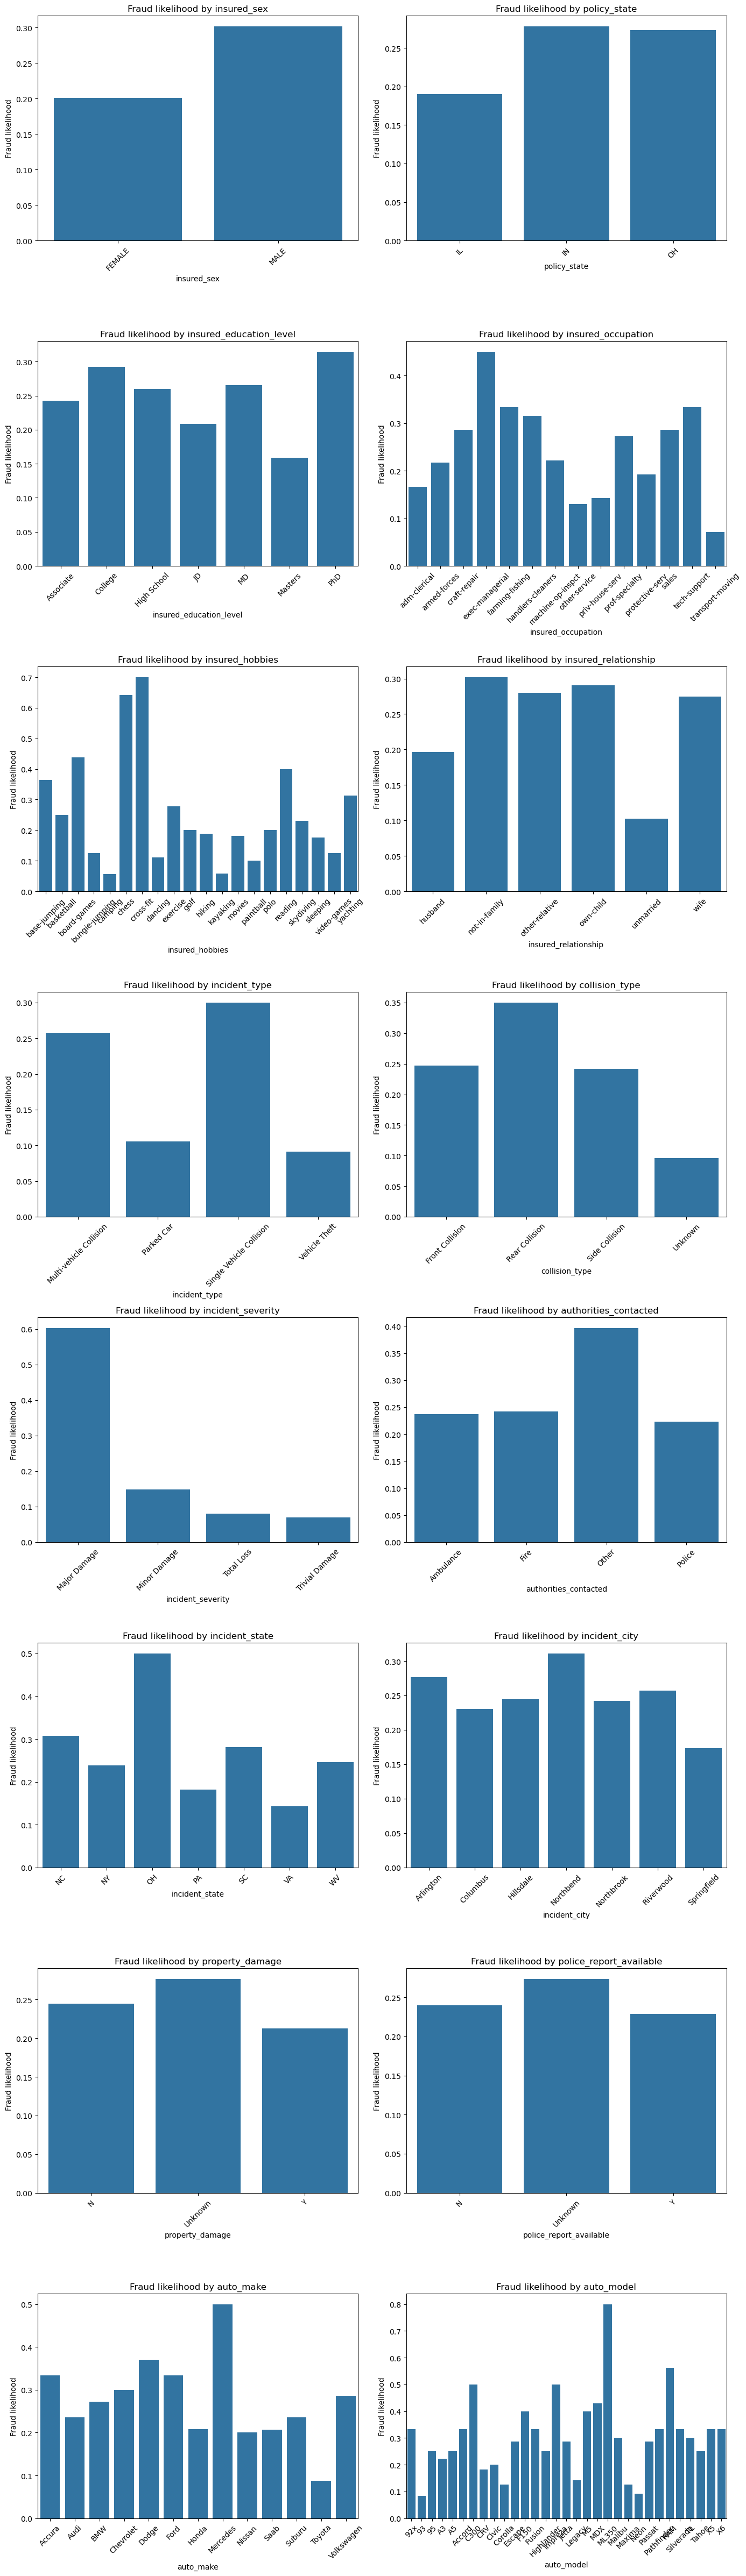

In [37]:
# Write a function to calculate and analyse the target variable likelihood for categorical features
df_test = pd.concat([X_test,y_test],axis=1)

categorical_columns = ['insured_sex','policy_state','insured_education_level',
                       'insured_occupation','insured_hobbies','insured_relationship','incident_type',
                       'collision_type','incident_severity','authorities_contacted','incident_state',
'incident_city','property_damage','police_report_available','auto_make','auto_model']

n_column = 2
n_rows = int(len(categorical_columns)/2)
fig, axes = plt.subplots(n_rows, n_column, figsize=(14, n_rows * 6))
axes = axes.flatten()


#fig , axes = plt.figure(n_rows,n_column,figsize=(15,10))

for i,col in enumerate(categorical_columns):
    value_map = {}
    fraud_reported_df = df_test[df_test['fraud_reported']=='Y'].groupby(col)['fraud_reported'].count()
    cat_values_df = df_test.groupby(col)['fraud_reported'].count()
    #print(cat_values_df)
    #print(list(fraud_reported_df.index))
    category_value_list = list(fraud_reported_df.index)
    for value in category_value_list:
        value_map[value]=fraud_reported_df[value]/cat_values_df[value]
    #print(value_map)
    plot_df = pd.DataFrame({
        'Category': list(value_map.keys()),
        'Likelihood': list(value_map.values())
    })
    sns.barplot(data = plot_df ,x= 'Category'  ,y= 'Likelihood',ax=axes[i])
    axes[i].set_title(f'Fraud likelihood by {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Fraud likelihood')
    # Rotate x-labels if needed
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()



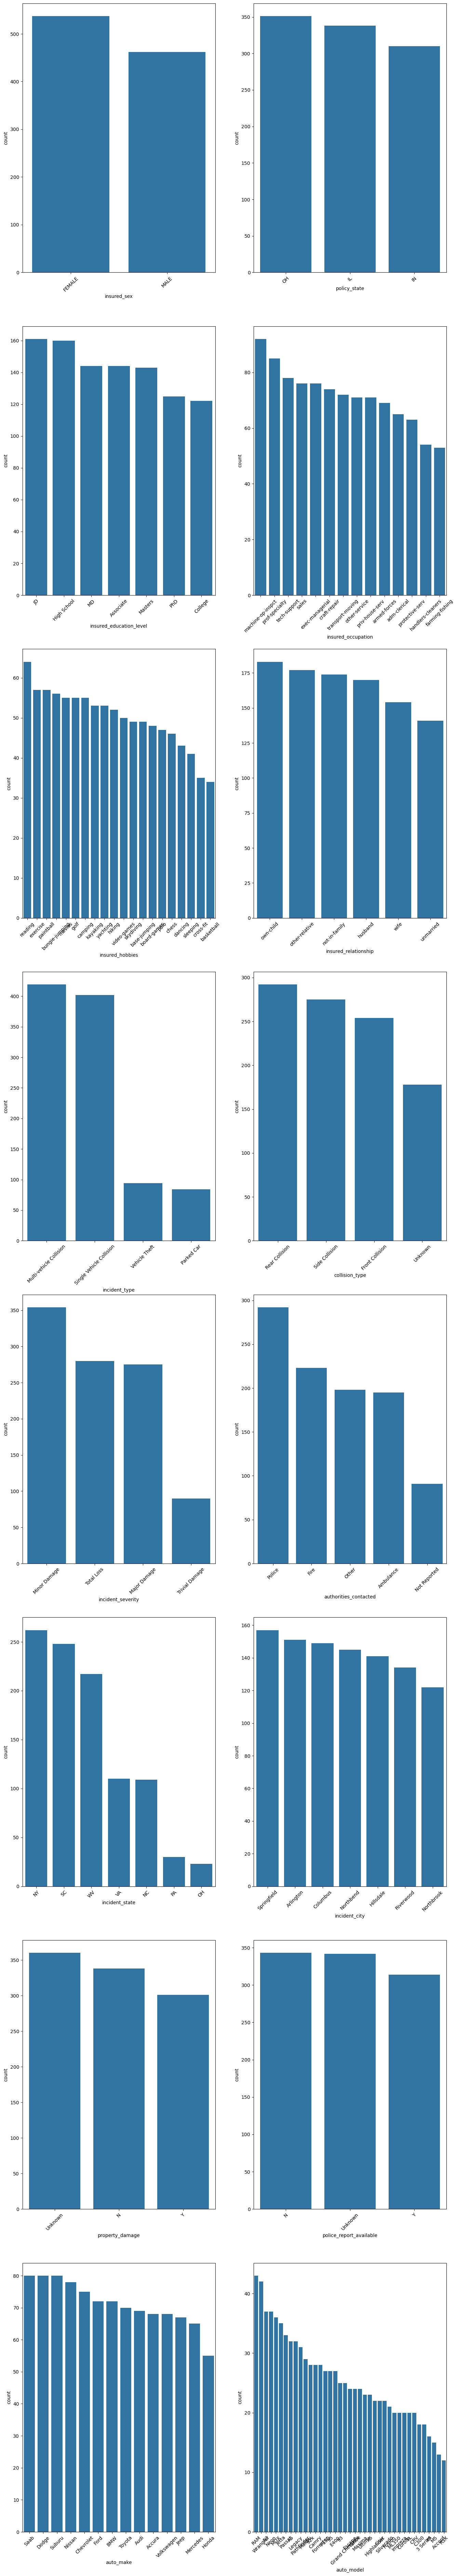

In [38]:
categorical_columns = ['insured_sex','policy_state','insured_education_level',
                       'insured_occupation','insured_hobbies','insured_relationship','incident_type',
                       'collision_type','incident_severity','authorities_contacted','incident_state',
'incident_city','property_damage','police_report_available','auto_make','auto_model']
n_rows = int(len(numerical_columns)/2)+2
n_cols = 2
fig , axes = plt.subplots(n_rows,n_cols,figsize = (16,n_rows * 12))

axes = axes.flatten()


for i,col in enumerate(categorical_columns):
    sns.barplot(x = list(insurance_df[col].value_counts().index), y = insurance_df[col].value_counts(), ax = axes[i])
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', rotation=45)
plt.show()

#### **5.4.2** Explore the relationships between numerical features and the target variable to understand their impact on the target outcome. Utilise appropriate visualisation techniques to identify trends and potential interactions.

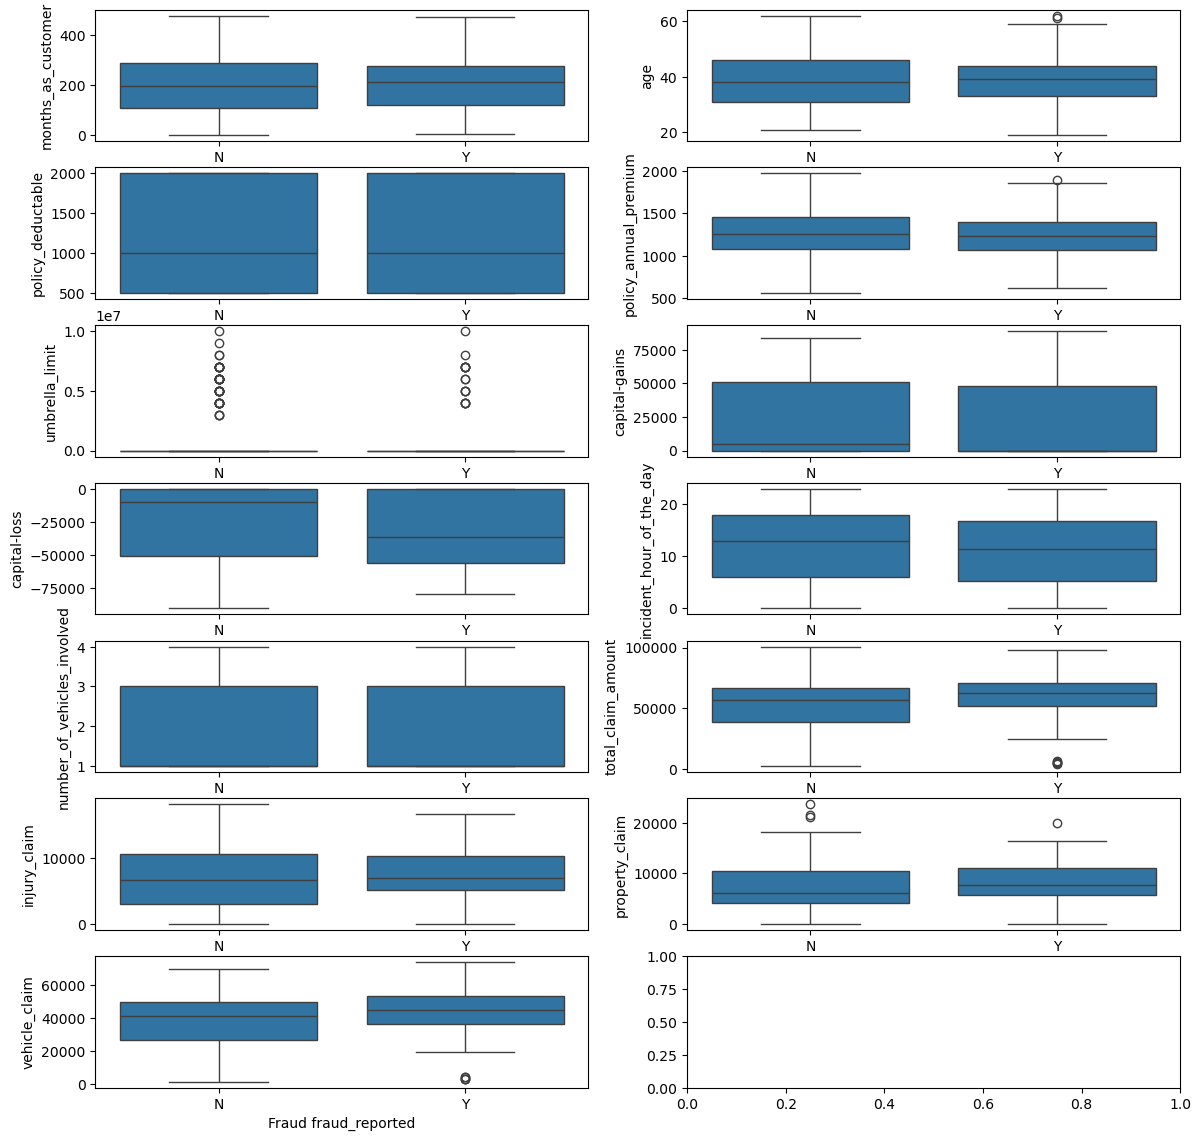

In [39]:
# Visualise the relationship between numerical features and the target variable to understand their impact on the target outcome
numerical_columns = ['months_as_customer','age','policy_deductable','policy_annual_premium',
                     'umbrella_limit','capital-gains','capital-loss','incident_hour_of_the_day',
                     'number_of_vehicles_involved','total_claim_amount','injury_claim','property_claim','vehicle_claim']
n_rows = int(len(numerical_columns)/2)+1
n_cols = 2
fig , axes = plt.subplots(n_rows,n_cols,figsize = (14,n_rows * 2))

axes = axes.flatten()


for i,col in enumerate(numerical_columns):
    sns.boxplot(data = df_test ,x = 'fraud_reported', y = col, ax = axes[i])
    axes[i].set_xlabel(f'Fraud fraud_reported')
plt.show()

## **6. Feature Engineering** <font color = red>[25 marks]</font>

### **6.1 Perform resampling** <font color="red">[3 Marks]</font>

Handle class imbalance in the training data by applying resampling technique.

Use the **RandomOverSampler** technique to balance the data and handle class imbalance. This method increases the number of samples in the minority class by randomly duplicating them, creating synthetic data points with similar characteristics. This helps prevent the model from being biased toward the majority class and improves its ability to predict the minority class more accurately.

**Note:** You can try other resampling techniques to handle class imbalance

In [40]:
# Import RandomOverSampler from imblearn library
from imblearn.over_sampling import RandomOverSampler

# Perform resampling on training data
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Check class distribution after resampling
from collections import Counter
print("Before:", Counter(y_train))
print("After:", Counter(y_resampled))


Before: Counter({'N': 526, 'Y': 173})
After: Counter({'N': 526, 'Y': 526})


### **6.2 Feature Creation** <font color="red">[4 marks]</font>

Create new features from existing ones to enhance the model's ability to capture patterns in the data. This may involve deriving features from date/time columns, combining features, or creating interaction terms.

In [41]:
# Create new features based on your understanding for both training and validation data
X_resampled['incident_month'] = X_resampled['incident_date'].dt.month
X_resampled['incident_day_of_week'] = X_resampled['incident_date'].dt.dayofweek
X_resampled['incident_dayno'] = X_resampled['incident_date'].dt.day
X_resampled['auto_no_of_years_till_claim'] = X_resampled['incident_date'].dt.year - X_resampled['auto_year']
X_resampled['auto_no_of_years_till_claim']
X_resampled[['csl_person', 'csl_accident']] = X_resampled['policy_csl'].str.split('/', expand=True).astype(int)


X_test['incident_month'] = X_test['incident_date'].dt.month
X_test['incident_day_of_week'] = X_test['incident_date'].dt.dayofweek
X_test['incident_dayno'] = X_test['incident_date'].dt.day
X_test['auto_no_of_years_till_claim'] = X_test['incident_date'].dt.year - X_resampled['auto_year']
X_test[['csl_person', 'csl_accident']] = X_test['policy_csl'].str.split('/', expand=True).astype(int)



X_test

months_as_customer  age policy_state policy_csl  policy_deductable  \
0                   458   59           IN    100/300               1000   
1                   235   42           IN    250/500                500   
2                   182   38           OH   500/1000               2000   
3                    35   35           IL    100/300               2000   
4                   229   37           IN   500/1000               1000   
..                  ...  ...          ...        ...                ...   
295                  56   42           IL    250/500                500   
296                  29   25           IL    250/500               2000   
297                 159   37           IL   500/1000               1000   
298                  27   28           OH   500/1000               1000   
299                 266   42           IL   500/1000               1000   

     policy_annual_premium  umbrella_limit insured_sex  \
0                  1685.69               0      FEMALE   
1                  1072.62               0      FEMALE   
2                  1441.06               0      FEMALE   
3                  1117.42               0      FEMALE   
4                  1331.94               0      FEMALE   
..                     ...             ...         ...   
295                1339.39               0      FEMALE   
296                1352.83               0        MALE   
297                 894.40               0        MALE   
298                1074.47               0        MALE   
299                 763.67               0        MALE   

    insured_education_level insured_occupation  ... vehicle_claim   auto_make  \
0               High School    protective-serv  ...         43080        Jeep   
1                   Masters  machine-op-inspct  ...         55280      Toyota   
2                   Masters       armed-forces  ...         65200       Dodge   
3                       PhD    protective-serv  ...         35460  Volkswagen   
4                   Masters    farming-fishing  ...         34720        Saab   
..                      ...                ...  ...           ...         ...   
295               Associate       adm-clerical  ...         39130         BMW   
296                 Masters    farming-fishing  ...         50470      Nissan   
297               Associate       tech-support  ...         54670       Dodge   
298                      MD    protective-serv  ...          2400        Jeep   
299               Associate     prof-specialty  ...         55090        Jeep   

         auto_model  auto_year incident_month incident_day_of_week  \
0    Grand Cherokee       1995              2                    1   
1        Highlander       2006              2                    2   
2               RAM       2005              1                    3   
3             Jetta       1996              2                    5   
4                95       2004              2                    3   
..              ...        ...            ...                  ...   
295              X5       1998              2                    2   
296      Pathfinder       2013              1                    3   
297             RAM       1999              1                    2   
298  Grand Cherokee       2012              2                    4   
299  Grand Cherokee       2005              2                    2   

    incident_dayno auto_no_of_years_till_claim csl_person csl_accident  
0               17                        10.0        100          300  
1               18                        14.0        250          500  
2                8                        10.0        500         1000  
3               14                        13.0        100          300  
4                5                         4.0        500         1000  
..             ...                         ...        ...          ...  
295             25                         0.0        250          500  
296      

In [42]:

X_resampled.shape

(1052, 40)

In [43]:
X_resampled.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_date', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'incident_month', 'incident_day_of_week',
       'incident_dayno', 'auto_no_of_years_till_claim', 'csl_person',
       'csl_accident'],
      dtype='object')

### **6.3 Handle redundant columns** <font color="red">[3 marks]</font>

Analyse the data to identify features that may be redundant or contribute minimal information toward predicting the target variable and drop them.

- You can consider features that exhibit high correlation with other variables, which you may have observed during the EDA phase.
- Features that don't strongly influence the prediction, which you may have observed during the EDA phase.
- Categorical columns with low value counts for some levels can be remapped to reduce number of unique levels, and features with very high counts for just one level may be removed, as they resemble unique identifier columns and do not provide substantial predictive value.
- Additionally, eliminate any columns from which the necessary features have already been extracted in the preceding step.

In [44]:
# Drop redundant columns from training and validation data

X_resampled.drop('months_as_customer',axis=1,inplace=True)
X_resampled.drop('property_claim',axis=1,inplace=True)
X_resampled.drop('vehicle_claim',axis=1,inplace=True)
X_resampled.drop('injury_claim',axis=1,inplace=True)
X_resampled.drop('incident_date',axis=1,inplace=True)
X_resampled.drop('auto_year',axis=1,inplace=True)
X_resampled.drop('auto_model',axis=1,inplace=True)
X_resampled.drop('umbrella_limit',axis=1,inplace=True)
X_resampled.drop('policy_deductable',axis=1,inplace=True)
X_resampled.drop('policy_csl',axis=1,inplace=True)

X_test.drop('months_as_customer',axis=1,inplace=True)
X_test.drop('property_claim',axis=1,inplace=True)
X_test.drop('vehicle_claim',axis=1,inplace=True)
X_test.drop('injury_claim',axis=1,inplace=True)
X_test.drop('incident_date',axis=1,inplace=True)
X_test.drop('auto_year',axis=1,inplace=True)
X_test.drop('auto_model',axis=1,inplace=True)
X_test.drop('umbrella_limit',axis=1,inplace=True)
X_test.drop('policy_deductable',axis=1,inplace=True)
X_test.drop('policy_csl',axis=1,inplace=True)

In [45]:
# Check the data
X_resampled.drop('capital-loss',axis=1,inplace=True)
X_resampled.drop('capital-gains',axis=1,inplace=True)
X_test.drop('capital-loss',axis=1,inplace=True)
X_test.drop('capital-gains',axis=1,inplace=True)

X_resampled.shape

(1052, 28)

### **6.4 Combine values in Categorical Columns** <font color="red">[6 Marks]</font>
During the EDA process, categorical columns with multiple unique values may be identified. To enhance model performance, it is essential to refine these categorical features by grouping values that have low frequency or provide limited predictive information.

Combine categories that occur infrequently or exhibit similar behavior to reduce sparsity and improve model generalisation.

In [46]:
# Combine categories that have low frequency or provide limited predictive information
relationship_mapping = {'husband' :'spouse','wife':'spouse','other-relative':'extended-family','own-child': 'extended-family','unmarried': 'non-family','not-in-family': 'non-family'}
X_resampled['insured_relationship'] = X_resampled['insured_relationship'].map(relationship_mapping)
X_resampled['insured_relationship'] 

relationship_mapping = {'husband' :'spouse','wife':'spouse','other-relative':'extended-family','own-child': 'extended-family','unmarried': 'non-family','not-in-family': 'non-family'}
X_test['insured_relationship'] = X_test['insured_relationship'].map(relationship_mapping)
X_test['insured_relationship'] 

0               spouse
1               spouse
2               spouse
3           non-family
4           non-family
            ...       
295         non-family
296    extended-family
297             spouse
298             spouse
299    extended-family
Name: insured_relationship, Length: 300, dtype: object

In [47]:
authorities_contacted_mapping = {'Fire':'Other','Police':'Police','Ambulance':'Other','Not Reported':'Other','Other':'Other'}
X_resampled['authorities_contacted'] = X_resampled['authorities_contacted'].map(authorities_contacted_mapping)
X_resampled['authorities_contacted'].unique()

X_test['authorities_contacted'] = X_test['authorities_contacted'].map(authorities_contacted_mapping)


In [48]:
X_resampled['police_report_available'].unique()
X_resampled['police_report_available'] = X_resampled['police_report_available'].str.replace('Unknown','N')
X_resampled['police_report_available']

X_test['police_report_available'] = X_test['police_report_available'].str.replace('Unknown','N')


In [49]:
X_resampled['incident_type'].unique()
incident_type_mapping = {}
X_resampled['incident_type'] = X_resampled['incident_type'].str.replace('Parked Car','Other').replace('Car Theft','Other')
X_resampled['police_report_available']

X_test['incident_type'] = X_test['incident_type'].str.replace('Parked Car','Other').replace('Car Theft','Other')


In [50]:
set(X_test.columns)-set(X_resampled.columns)

set()

### **6.5 Dummy variable creation** <font color="red">[6 Marks]</font>
Transform categorical variables into numerical representations using dummy variables. Ensure consistent encoding between training and validation data.

#### **6.5.1** Identify categorical columns for dummy variable creation <font color="red">[1 Mark]</font>

In [51]:
# Identify the categorical columns for creating dummy variables
X_resampled.columns
categorical_variables = ['insured_sex','policy_state','insured_hobbies','incident_city','insured_relationship', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state','property_damage'
                         ,'police_report_available','auto_make','insured_education_level','insured_occupation']
X_resampled.shape

(1052, 28)

#### **6.5.2** Create dummy variables for categorical columns in training data <font color="red">[2 Marks]</font>

In [52]:
# Create dummy variables using the 'get_dummies' for categorical columns in training data
X_encoded = X_resampled.copy()
for col in categorical_variables:
    cont = pd.get_dummies(X_resampled[col],prefix=col,drop_first=True,dtype=int)
    X_encoded = pd.concat([X_encoded,cont],axis=1)
    X_encoded.drop(col,axis=1,inplace=True)
X_encoded.shape

(1052, 94)

#### **6.5.3** Create dummy variables for categorical columns in validation data <font color="red">[2 Marks]</font>

In [53]:
# Create dummy variables using the 'get_dummies' for categorical columns in validation data
X_test_encoded = X_test.copy()
for col in categorical_variables:
    cont = pd.get_dummies(X_test_encoded[col],prefix=col,drop_first=True,dtype=int)
    X_test_encoded = pd.concat([X_test_encoded,cont],axis=1)
    X_test_encoded.drop(col,axis=1,inplace=True)
X_test_encoded.shape
set(X_encoded.columns)-set(X_test_encoded.columns)

set()

#### **6.5.4** Create dummy variable for dependent feature in training and validation data <font color = "red">[1 Mark]</font>

In [54]:
# Create dummy variable for dependent feature in training data
y_train_encoded = pd.get_dummies(y_resampled,prefix='fraud_claim',drop_first=True,dtype=int)
# Create dummy variable for dependent feature in validation data
y_test_encoded = pd.get_dummies(y_test,prefix='fraud_claim',drop_first=True,dtype=int)

y_train_encoded

fraud_claim_Y
0                 0
1                 0
2                 0
3                 0
4                 0
...             ...
1047              1
1048              1
1049              1
1050              1
1051              1

[1052 rows x 1 columns]

### **6.6 Feature scaling** <font color = red>[3 marks]</font>
Scale numerical features to a common range to prevent features with larger values from dominating the model.  Choose a scaling method appropriate for the data and the chosen model. Apply the same scaling to both training and validation data.

In [55]:
# Import the necessary scaling tool from scikit-learn
from sklearn.preprocessing import StandardScaler
numerical_columns = ['months_as_customer','age','policy_annual_premium',
                     'incident_hour_of_the_day',
                     'number_of_vehicles_involved','total_claim_amount']
# Scale the numeric features present in the training data
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_encoded),columns =  X_encoded.columns)
# Scale the numeric features present in the validation data
X_test_scaled = pd.DataFrame(scaler.transform(X_test_encoded),columns =  X_test_encoded.columns)

In [56]:
X_encoded = X_train_scaled
X_test_encoded = X_test_scaled
X_encoded.shape
X_test_encoded.shape

(300, 94)

## **7. Model Building** <font color = red>[50 marks]</font>

In this task, you will be building two machine learning models: Logistic Regression and Random Forest. Each model will go through a structured process to ensure optimal performance. The key steps for each model are outlined below:

**Logistic Regression Model**
- Feature Selection using RFECV – Identify the most relevant features using Recursive Feature Elimination with Cross-Validation.
- Model Building and Multicollinearity Assessment – Build the logistic regression model and analyse statistical aspects such as p-values and VIFs to detect multicollinearity.
- Model Training and Evaluation on Training Data – Fit the model on the training data and assess initial performance.
- Finding the Optimal Cutoff – Determine the best probability threshold by analysing the sensitivity-specificity tradeoff and precision-recall tradeoff.
- FInal Prediction and Evaluation on Training Data using the Optimal Cutoff – Generate final predictions using the selected cutoff and evaluate model performance.

**Random Forest Model**
- Get Feature Importances - Obtain the importance scores for each feature and select the important features to train the model.
- Model Evaluation on Training Data – Assess performance metrics on the training data.
- Check Model Overfitting using Cross-Validation – Evaluate generalisation by performing cross-validation.
- Hyperparameter Tuning using Grid Search – Optimise model performance by fine-tuning hyperparameters.
- Final Model and Evaluation on Training Data – Train the final model using the best parameters and assess its performance.

### **7.1 Feature selection** <font color = red>[4 marks]</font>
Identify and select the most relevant features for building a logistic regression model using Recursive Feature Elimination with Cross-Validation (RFECV).

#### **7.1.1** Import necessary libraries <font color="red">[1 Mark]</font>

In [57]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold
y_train_encoded = np.reshape(y_train_encoded['fraud_claim_Y'],(y_train_encoded['fraud_claim_Y'].count(),))

#### **7.1.2** Perform feature selection <font color="red">[2 Mark]</font>

In [58]:
# Apply RFECV to identify the most relevant features
lr_model = LogisticRegression()
rfecv = RFECV(estimator=lr_model, cv = KFold(5), scoring ='f1',n_jobs = -1)
rfecv.fit(X_encoded,y_train_encoded)

RFECV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
      estimator=LogisticRegression(), n_jobs=-1, scoring='f1')

In [59]:
# Display the features ranking by RFECV in a DataFrame
featre_ranking_df = pd.DataFrame(columns = ['Feature','Ranking'])
featre_ranking_df['Feature']= X_encoded.columns
featre_ranking_df['Ranking']= rfecv.ranking_

featre_ranking_df.sort_values(by = 'Ranking', ascending = True).iloc[0:10,:]

Feature  Ranking
49          incident_severity_Minor Damage        1
21               insured_hobbies_cross-fit        1
12                            csl_accident        1
11                              csl_person        1
50            incident_severity_Total Loss        1
51        incident_severity_Trivial Damage        1
20                   insured_hobbies_chess        1
3              number_of_vehicles_involved        2
44  incident_type_Single Vehicle Collision        3
48                  collision_type_Unknown        4

#### **7.1.2** Retain the selected features <font color="red">[1 Mark]</font>

In [60]:
col = featre_ranking_df[featre_ranking_df['Ranking']==1]['Feature']
list(col)

['csl_person',
 'csl_accident',
 'insured_hobbies_chess',
 'insured_hobbies_cross-fit',
 'incident_severity_Minor Damage',
 'incident_severity_Total Loss',
 'incident_severity_Trivial Damage']

### **7.2 Build Logistic Regression Model** <font color = red>[12 marks]</font>
After selecting the optimal features using RFECV, utilise these features to build a logistic regression model with Statsmodels. This approach enables a detailed statistical analysis of the model, including the assessment of p-values and Variance Inflation Factors (VIFs). Evaluating these metrics is crucial for detecting multicollinearity and ensuring that the selected predictors are not highly correlated.

#### **7.2.1** Select relevant features and add constant in training data <font color="red">[1 Mark]</font>

In [61]:
# Select only the columns selected by RFECV
X_train_lr = X_encoded[col]

In [62]:
# Import statsmodels and add constant
import statsmodels.api as sm
X_train_lr_constant = sm.add_constant(X_train_lr)

# Check the data
X_train_lr_constant

const  csl_person  csl_accident  insured_hobbies_chess  \
0       1.0    1.426453      1.480138               -0.32589   
1       1.0    1.426453      1.480138               -0.32589   
2       1.0   -0.112022     -0.254605               -0.32589   
3       1.0   -0.112022     -0.254605               -0.32589   
4       1.0    1.426453      1.480138               -0.32589   
...     ...         ...           ...                    ...   
1047    1.0   -1.035107     -0.948502               -0.32589   
1048    1.0   -1.035107     -0.948502               -0.32589   
1049    1.0   -0.112022     -0.254605               -0.32589   
1050    1.0   -0.112022     -0.254605               -0.32589   
1051    1.0    1.426453      1.480138               -0.32589   

      insured_hobbies_cross-fit  incident_severity_Minor Damage  \
0                     -0.221028                       -0.633087   
1                     -0.221028                       -0.633087   
2                     -0.221028                       -0.633087   
3                     -0.221028                        1.579562   
4                     -0.221028                       -0.633087   
...                         ...                             ...   
1047                  -0.221028                       -0.633087   
1048                  -0.221028                       -0.633087   
1049                  -0.221028                       -0.633087   
1050                  -0.221028                        1.579562   
1051                   4.524311                       -0.633087   

      incident_severity_Total Loss  incident_severity_Trivial Damage  
0                        -0.559784                         -0.256624  
1                         1.786403                         -0.256624  
2                        -0.559784                          3.896744  
3                        -0.559784                         -0.256624  
4                         1.786403                         -0.256624  
...                            ...                               ...  
1047                     -0.559784                         -0.256624  
1048                     -0.559784                          3.896744  
1049                     -0.559784                         -0.256624  
1050                     -0.559784                         -0.256624  
1051                      1.786403                         -0.256624  

[1052 rows x 8 columns]

#### **7.2.2** Fit logistic regression model <font color="red">[2 Marks]</font>

In [63]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary
logm1 = sm.GLM(y_train_encoded,(X_train_lr_constant), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 1052
Model:                            GLM   Df Residuals:                     1044
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -392.88
Date:                Wed, 16 Jul 2025   Deviance:                       785.77
Time:                        22:27:48   Pearson chi2:                 3.82e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4724
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.0736      0.103      0.714      0.475      -0.128       0.275
csl_person                           2.2997      0.925      2.486      0.013       0.486       4.113
csl_accident                        -2.4176      0.926     -2.610      0.009      -4.233      -0.602
insured_hobbies_chess                1.6092      0.180      8.951      0.000       1.257       1.962
insured_hobbies_cross-fit            0.7487      0.101      7.432      0.000       0.551       0.946
incident_severity_Minor Damage      -1.7163      0.112    -15.283      0.000      -1.936      -1.496
incident_severity_Total Loss        -1.3750      0.101    -13.632      0.000      -1.573      -1.177
incident_severity_Trivial Damage    -1.0088      0.123     -8.197      0.000      -1.250      -0.768
====================================================================================================
"""

**Model Interpretation**

The output summary table will provide the features used for building model along with coefficient of each of the feature and their p-value. The p-value in a logistic regression model is used to assess the statistical significance of each coefficient. Lesser the p-value, more significant the feature is in the model.

A positive coefficient will indicate that an increase in the value of feature would increase the odds of the event occurring. On the other hand, a negative coefficient means the opposite, i.e, an increase in the value of feature would decrease the odds of the event occurring.

Now check VIFs for presence of multicollinearity in the model.

#### **7.2.3** Evaluate VIF of features to assess multicollinearity <font color="red">[2 Marks]</font>

In [64]:
# Import 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
# Make a VIF DataFrame for all the variables present
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_lr.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_lr.values, i) for i in range(X_train_lr.shape[1])]
vif_data

Feature        VIF
0                        csl_person  97.021180
1                      csl_accident  97.001096
2             insured_hobbies_chess   1.047327
3         insured_hobbies_cross-fit   1.020252
4    incident_severity_Minor Damage   1.235402
5      incident_severity_Total Loss   1.250956
6  incident_severity_Trivial Damage   1.085800

In [66]:
X_train_lr_constant = X_train_lr_constant.drop('csl_person',axis=1)
logm2 = sm.GLM(y_train_encoded,(X_train_lr_constant), family = sm.families.Binomial())
model2 = logm2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 1052
Model:                            GLM   Df Residuals:                     1045
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -396.05
Date:                Wed, 16 Jul 2025   Deviance:                       792.09
Time:                        22:27:48   Pearson chi2:                 3.32e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4692
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.0746      0.103      0.726      0.468      -0.127       0.276
csl_accident                        -0.1283      0.092     -1.389      0.165      -0.309       0.053
insured_hobbies_chess                1.5785      0.179      8.830      0.000       1.228       1.929
insured_hobbies_cross-fit            0.7444      0.100      7.432      0.000       0.548       0.941
incident_severity_Minor Damage      -1.6850      0.110    -15.293      0.000      -1.901      -1.469
incident_severity_Total Loss        -1.3557      0.099    -13.628      0.000      -1.551      -1.161
incident_severity_Trivial Damage    -0.9806      0.123     -7.986      0.000      -1.221      -0.740
====================================================================================================
"""

In [67]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_lr_constant.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_lr_constant.values, i) for i in range(X_train_lr_constant.shape[1])]
vif_data

Feature       VIF
0                             const  1.000000
1                      csl_accident  1.004068
2             insured_hobbies_chess  1.042473
3         insured_hobbies_cross-fit  1.020174
4    incident_severity_Minor Damage  1.231542
5      incident_severity_Total Loss  1.249936
6  incident_severity_Trivial Damage  1.080419

In [68]:
X_train_lr_constant = X_train_lr_constant.drop('csl_accident',axis=1)
logm3 = sm.GLM(y_train_encoded,(X_train_lr_constant), family = sm.families.Binomial())
model3 = logm3.fit()
model3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 1052
Model:                            GLM   Df Residuals:                     1046
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -397.01
Date:                Wed, 16 Jul 2025   Deviance:                       794.02
Time:                        22:27:48   Pearson chi2:                 3.17e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4682
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.0744      0.103      0.724      0.469      -0.127       0.276
insured_hobbies_chess                1.5755      0.179      8.819      0.000       1.225       1.926
insured_hobbies_cross-fit            0.7379      0.100      7.401      0.000       0.542       0.933
incident_severity_Minor Damage      -1.6876      0.110    -15.317      0.000      -1.904      -1.472
incident_severity_Total Loss        -1.3570      0.099    -13.667      0.000      -1.552      -1.162
incident_severity_Trivial Damage    -0.9804      0.122     -8.028      0.000      -1.220      -0.741
====================================================================================================
"""

In [69]:
vif_data = pd.DataFrame()
vif_data["Feature"] = X_train_lr_constant.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_lr_constant.values, i) for i in range(X_train_lr_constant.shape[1])]
vif_data

Feature       VIF
0                             const  1.000000
1             insured_hobbies_chess  1.041857
2         insured_hobbies_cross-fit  1.020116
3    incident_severity_Minor Damage  1.228759
4      incident_severity_Total Loss  1.247809
5  incident_severity_Trivial Damage  1.080207

Proceed to the next step if p-values and VIFs are within acceptable ranges. If you observe high p-values or VIFs, drop the features and retrain the model. <font color="red">[THIS IS OPTIONAL]</font>

#### **7.2.4** Make predictions on training data <font color = "red">[1 Mark]</font>

In [70]:
# Predict the probabilities on the training data
y_train_pred = model3.predict(X_train_lr_constant)
# Reshape it into an array
y_train_pred_arr = np.reshape(y_train_pred , (1052,))

#### **7.2.5** Create a DataFrame that includes actual fraud reported flags, predicted probabilities, and a column indicating predicted classifications based on a cutoff value of 0.5 <font color="red">[1 Mark]</font>



In [71]:
# Create a new DataFrame containing the actual fraud reported flag and the probabilities predicted by the model
train_predicted_df = pd.DataFrame({'predited_fraud_prob' :y_train_pred_arr,'actual_fraud':y_train_encoded})
train_predicted_df
# Create new column indicating predicted classifications based on a cutoff value of 0.5
train_predicted_df['predicted_fraud'] = train_predicted_df['predited_fraud_prob'].apply(lambda x : 1 if x>0.5 else 0)
train_predicted_df

predited_fraud_prob  actual_fraud  predicted_fraud
0                0.814196             0                1
1                0.153641             0                0
2                0.069500             0                0
3                0.094785             0                0
4                0.153641             0                0
...                   ...           ...              ...
1047             0.814196             1                1
1048             0.069500             1                0
1049             0.814196             1                1
1050             0.094785             1                0
1051             0.857567             1                1

[1052 rows x 3 columns]

**Model performance evaluation**

Evaluate the performance of the model based on predictions made on the training data.

#### **7.2.6** Check the accuracy of the model <font color = "red">[1 Mark]</font>

In [72]:
# Import metrics from sklearn for evaluation
from sklearn import metrics

# Check the accuracy of the model
metrics.accuracy_score(train_predicted_df.actual_fraud, train_predicted_df.predicted_fraud)

0.8754752851711026

#### **7.2.7** Create a confusion matrix based on the predictions made on the training data <font color="red">[1 Mark]</font>

In [73]:
# Create confusion matrix
confusion = metrics.confusion_matrix( train_predicted_df.actual_fraud, train_predicted_df.predicted_fraud)
confusion

array([[447,  79],
       [ 52, 474]])

#### **7.2.8** Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [74]:
# Create variables for true positive, true negative, false positive and false negative
tp , tn , fp , fn = confusion.ravel()

tp , tn , fp , fn

(447, 79, 52, 474)

#### **7.2.9** Calculate sensitivity, specificity, precision, recall and F1-score <font color="red">[2 Marks]</font>

In [75]:
# Calculate the sensitivity
sesitivity = tp / (tp+fn)

# Calculate the specificity
specificity = tn / (tn+fp)

# Calculate Precision
Precision = tp / (tp+fp)

# Calculate Recall
recall = tp / (tp+fn)

# Calculate F1 Score
f1 = (2*Precision*recall)/(recall+Precision)
f1 , sesitivity , specificity , Precision , recall

(0.6295774647887323,
 0.48534201954397393,
 0.6030534351145038,
 0.8957915831663327,
 0.48534201954397393)

### **7.3 Find the Optimal Cutoff** <font color = red>[12 marks]</font>
Find the optimal cutoff to improve model performance by evaluating various cutoff values and their impact on relevant metrics.

#### **7.3.1** Plot ROC Curve  to visualise the trade-off between true positive rate and false positive rate across different classification thresholds <font color="red">[2 Marks]</font>

In [76]:
# Import libraries or function to plot the ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

# Define ROC function
fpr, tpr, thresholds = roc_curve(y_train_encoded, y_train_pred_arr)

roc_auc = roc_auc_score(y_train_encoded, y_train_pred_arr)

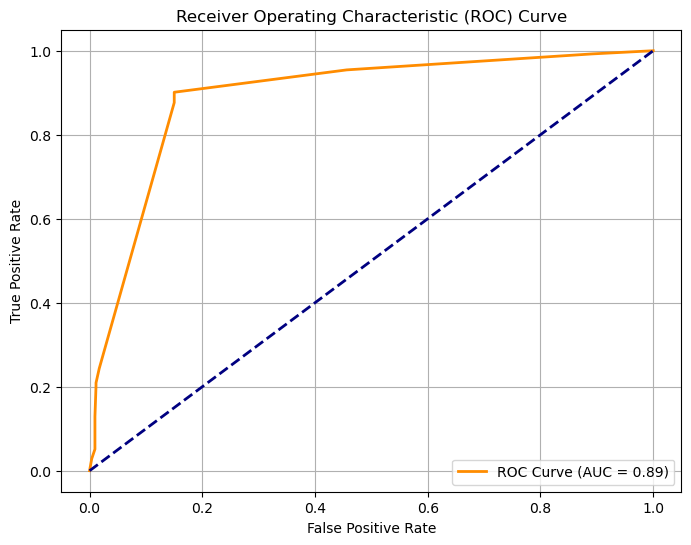

In [77]:
# Call the ROC function
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**Sensitivity and Specificity tradeoff**

After analysing the area under the curve of the ROC, check the sensitivity and specificity tradeoff to find the optimal cutoff point.

#### **7.3.2** Predict on training data at various probability cutoffs <font color="red">[1 Mark]</font>

In [78]:
# Create columns with different probability cutoffs to explore the impact of cutoff on model performance
cut_points = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]

#### **7.3.3** Plot accuracy, sensitivity, specificity at different values of probability cutoffs <font color="red">[2 Marks]</font>

In [79]:
# Create a DataFrame to see the values of accuracy, sensitivity, and specificity at different values of probability cutoffs
sesitivity_list = []
specificity_list = []
Precision_list = []
accuracy_list = []
for point in cut_points:

    train_predicted_df['predicted_fraud'] = train_predicted_df['predited_fraud_prob'].apply(lambda x : 1 if x>point else 0)
    accuracy_list.append(metrics.accuracy_score(train_predicted_df.actual_fraud, train_predicted_df.predicted_fraud))
    confusion = metrics.confusion_matrix( train_predicted_df.actual_fraud, train_predicted_df.predicted_fraud)
    tp , tn , fp , fn = confusion.ravel()
    sesitivity = tp / (tp+fn)
    sesitivity_list.append(sesitivity)
    # Calculate the specificity
    specificity = tn / (tn+fp)
    specificity_list.append(specificity)
    # Calculate Precision
    Precision = tp / (tp+fp)
    Precision_list.append(Precision)

metric_df = pd.DataFrame({'cut_offpoint':cut_points,'sesitivity': sesitivity_list ,
                          'specificity': specificity_list ,'Precision': Precision_list,'accuracy_list':accuracy_list})
metric_df

cut_offpoint  sesitivity  specificity  Precision  accuracy_list
0           0.1    0.362944     0.909091   0.922581       0.749049
1           0.2    0.485342     0.603053   0.895792       0.875475
2           0.3    0.485342     0.603053   0.895792       0.875475
3           0.4    0.485342     0.603053   0.895792       0.875475
4           0.5    0.485342     0.603053   0.895792       0.875475
5           0.6    0.485342     0.603053   0.895792       0.875475
6           0.7    0.485342     0.603053   0.895792       0.875475
7           0.8    0.492291     0.548611   0.873047       0.863118

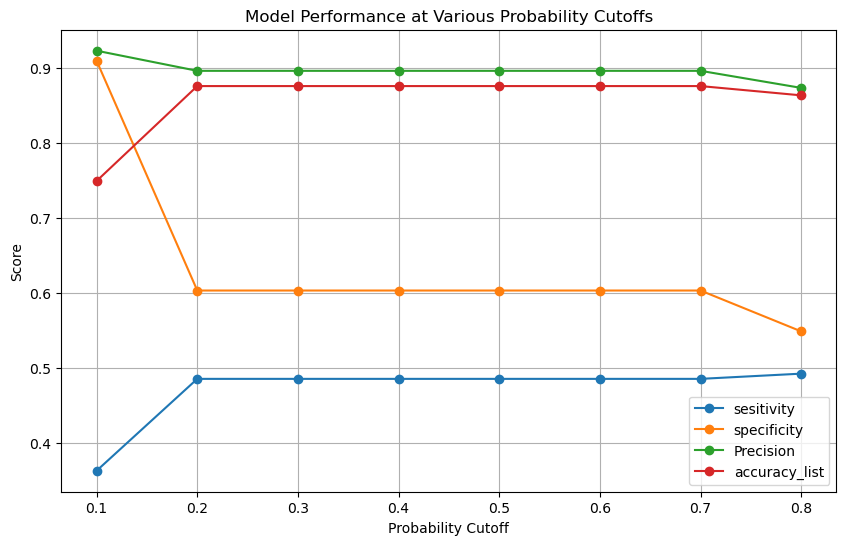

In [80]:
# Plot accuracy, sensitivity, and specificity at different values of probability cutoffs
metric_df.set_index('cut_offpoint', inplace=True)

metric_df.plot(figsize=(10, 6), marker='o')
plt.title('Model Performance at Various Probability Cutoffs')
plt.ylabel('Score')
plt.xlabel('Probability Cutoff')
plt.grid(True)
plt.legend(loc='best')
plt.show()

#### **7.3.4** Create a column for final prediction based on optimal cutoff <font color="red">[1 Mark]</font>

In [81]:
# Create a column for final prediction based on the optimal cutoff
train_predicted_df['final_predicted_fraud'] = train_predicted_df['predited_fraud_prob'].apply(lambda x : 1 if x>0.2 else 0)


#### **7.3.5** Calculate the accuracy <font color="red">[1 Mark]</font>

In [82]:
# Check the accuracy now
acuracy_score = metrics.accuracy_score(train_predicted_df.actual_fraud, train_predicted_df['final_predicted_fraud'])

#### **7.3.6** Create confusion matrix <font color="red">[1 Mark]</font>

In [83]:
# Create the confusion matrix once again
metrics.confusion_matrix(train_predicted_df.actual_fraud, train_predicted_df['final_predicted_fraud'])

array([[447,  79],
       [ 52, 474]])

#### **7.3.7** Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [84]:
# Create variables for true positive, true negative, false positive and false negative
tp , tn , fp , fn = confusion.ravel()


#### **7.3.8** Calculate sensitivity, specificity, precision, recall and F1-score of the model <font color="red">[2 Mark]</font>

In [85]:
# Calculate the sensitivity
sesitivity = tp / (tp+fn)

# Calculate the specificity
specificity = tn / (tn+fp)

# Calculate Precision
Precision = tp / (tp+fp)

# Calculate Recall
recall = tp / (tp+fn)

# Calculate F1 Score
f1 = (2*Precision*recall)/(recall+Precision)
f1 , sesitivity , specificity , Precision , recall

(0.6295774647887324,
 0.4922907488986784,
 0.5486111111111112,
 0.873046875,
 0.4922907488986784)

**Precision and Recall tradeoff**

Check optimal cutoff value by plotting precision-recall curve, and adjust the cutoff based on precision and recall tradeoff if required.

In [86]:
# Import precision-recall curve function
from sklearn.metrics import precision_recall_curve

#### **7.3.9** Plot precision-recall curve <font color="red">[1 Mark]</font>

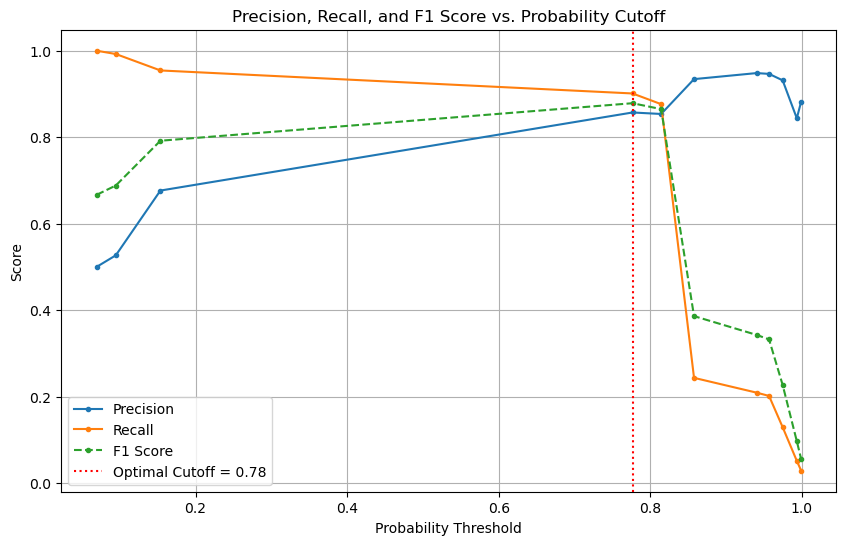

In [87]:
# Plot precision-recall curve
from sklearn.metrics import precision_recall_curve, f1_score
import matplotlib.pyplot as plt
import numpy as np

# Compute precision-recall pairs for different thresholds
precision, recall, thresholds = precision_recall_curve(y_train_encoded, y_train_pred_arr)

# Calculate F1 score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)  # Add epsilon to avoid division by zero

# Find threshold with max F1 Score
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision', marker='.')
plt.plot(thresholds, recall[:-1], label='Recall', marker='.')
plt.plot(thresholds, f1_scores[:-1], label='F1 Score', linestyle='--', marker='.')
plt.axvline(best_threshold, color='red', linestyle=':', label=f'Optimal Cutoff = {best_threshold:.2f}')
plt.xlabel("Probability Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1 Score vs. Probability Cutoff")
plt.legend()
plt.grid(True)
plt.show()

### **7.4 Build Random Forest Model** <font color = red>[12 marks]</font>
Now that you have built a logistic regression model, let's move on to building a random forest model.

#### **7.4.1** Import necessary libraries

In [88]:
# Import necessary libraries
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

#### **7.4.2** Build the random forest model <font color="red">[1 Mark]</font>

In [89]:
# Build a base random forest model

#print(X_test.shape)
print(X_encoded.shape)
print(y_train_encoded.shape)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
rf_model = RandomForestClassifier(random_state=42,max_depth=5)

rf_model.fit(X_encoded, y_train_encoded)


y_pred = rf_model.predict(X_encoded)
print(y_pred)

print("Accuracy:", accuracy_score(y_train_encoded, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_train_encoded, y_pred))
print("\nClassification Report:\n", classification_report(y_train_encoded, y_pred))

(1052, 94)
(1052,)
[1 0 0 ... 1 0 1]
Accuracy: 0.9125475285171103

Confusion Matrix:
 [[461  65]
 [ 27 499]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.88      0.91       526
           1       0.88      0.95      0.92       526

    accuracy                           0.91      1052
   macro avg       0.91      0.91      0.91      1052
weighted avg       0.91      0.91      0.91      1052



#### **7.4.3** Get feature importance scores and select important features <font color="red">[2 Marks]</font>

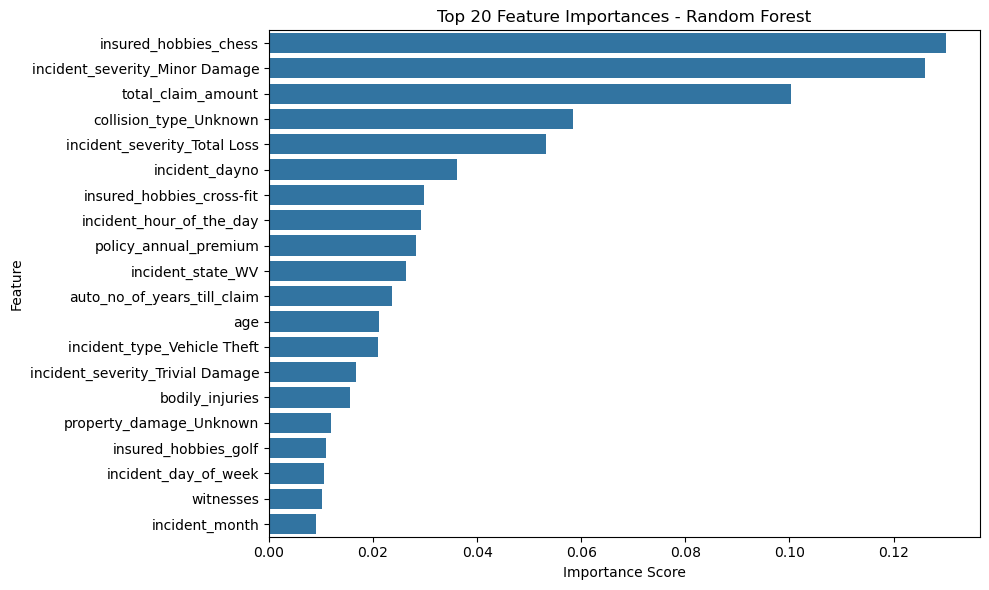

In [90]:
# Get feature importance scores from the trained model
importances = rf_model.feature_importances_


feature_importance_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
plt.title('Top 20 Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()



In [91]:
# Select features with high importance scores

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


top_features = feature_importance_df.head(15)['Feature'].tolist()

X_train_selected = X_encoded[top_features]




#### **7.4.4** Train the model with selected features <font color="red">[1 Mark]</font>

In [92]:
rf_selected = RandomForestClassifier(random_state=42)
rf_selected.fit(X_train_selected, y_train_encoded)


RandomForestClassifier(random_state=42)

#### **7.4.5** Generate predictions on the training data <font color="red">[1 Mark]</font>

In [93]:
# Predict on the training data
y_train_pred = rf_selected.predict(X_train_selected)

print("\nClassification Report:\n", classification_report(y_train_encoded, y_train_pred))



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       526
           1       1.00      1.00      1.00       526

    accuracy                           1.00      1052
   macro avg       1.00      1.00      1.00      1052
weighted avg       1.00      1.00      1.00      1052



#### **7.4.6** Check accuracy of the model <font color="red">[1 Mark]</font>

In [94]:
# Check accuracy of the model
print("Training Accuracy:", accuracy_score(y_train_encoded, y_train_pred))

Training Accuracy: 1.0


#### **7.4.7** Create confusion matrix <font color="red">[1 Mark]</font>

In [95]:
print("\nConfusion Matrix:\n", confusion_matrix(y_train_encoded, y_train_pred))


Confusion Matrix:
 [[526   0]
 [  0 526]]


#### **7.4.8** Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [96]:
# Create variables for true positive, true negative, false positive and false negative
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_encoded, y_train_pred)

TN, FP, FN, TP = cm.ravel()

print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)


True Positives (TP): 526
True Negatives (TN): 526
False Positives (FP): 0
False Negatives (FN): 0


#### **7.4.9** Calculate sensitivity, specificity, precision, recall and F1-score of the model <font color="red">[2 Marks]</font>

In [97]:
# Calculate the sensitivity
sensitivity = TP / (TP + FN)

# Calculate the specificity

specificity = TN / (TN + FP)
# Calculate Precision
precision = TP / (TP + FP)

# Calculate Recall

recall = sensitivity

# Calculate F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

print("Sensitivity (Recall):", round(sensitivity, 2))
print("Specificity:", round(specificity, 2))
print("Precision:", round(precision, 2))
print("Recall:", round(recall, 2))
print("F1 Score:", round(f1_score, 2))


Sensitivity (Recall): 1.0
Specificity: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


#### **7.4.10** Check if the model is overfitting training data using cross validation <font color = "red">[2 marks]</font>

In [98]:
# Use cross validation to check if the model is overfitting
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score

rf_cv = RandomForestClassifier(random_state=42)


f1 = make_scorer(f1_score)

cv_scores = cross_val_score(rf_cv, X_train_selected, y_train_encoded, cv=5, scoring=f1)

print("Cross-Validation F1 Scores:", cv_scores)
print("Mean CV F1 Score:", round(cv_scores.mean(), 3))
print("Standard Deviation:", round(cv_scores.std(), 3))


Cross-Validation F1 Scores: [0.89201878 0.93636364 0.95454545 0.92920354 0.95022624]
Mean CV F1 Score: 0.932
Standard Deviation: 0.022


### **7.5 Hyperparameter Tuning** <font color = red>[10 Marks]</font>
 Enhance the performance of the random forest model by systematically exploring and selecting optimal hyperparameter values using grid search.

#### **7.5.1** Use grid search to find the best hyperparameter values <font color = red>[2 Marks]</font>

In [99]:
# Use grid search to find the best hyperparamter values

# Best Hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_leaf': [1, 5, 10],
    'min_samples_split':[5,10,20,50,100],
    'class_weight': ['balanced', None]
}

# Use F1 score as evaluation metric
f1 = make_scorer(f1_score)

# Initialize Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Initialize Grid Search
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring=f1,
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Fit Grid Search on training data
grid_search.fit(X_train_selected, y_train_encoded)

# Get best model and parameters
best_rf = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)


Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best Hyperparameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


#### **7.5.2** Build a random forest model based on hyperparameter tuning results <font color = red>[1 Mark]</font>

[0.10758854 0.15474931 0.12304857 0.02614623 0.10308658 0.07943165
 0.0363113  0.06680041 0.08653345 0.01857363 0.0731117  0.07724028
 0.00982588 0.01007669 0.02747579]


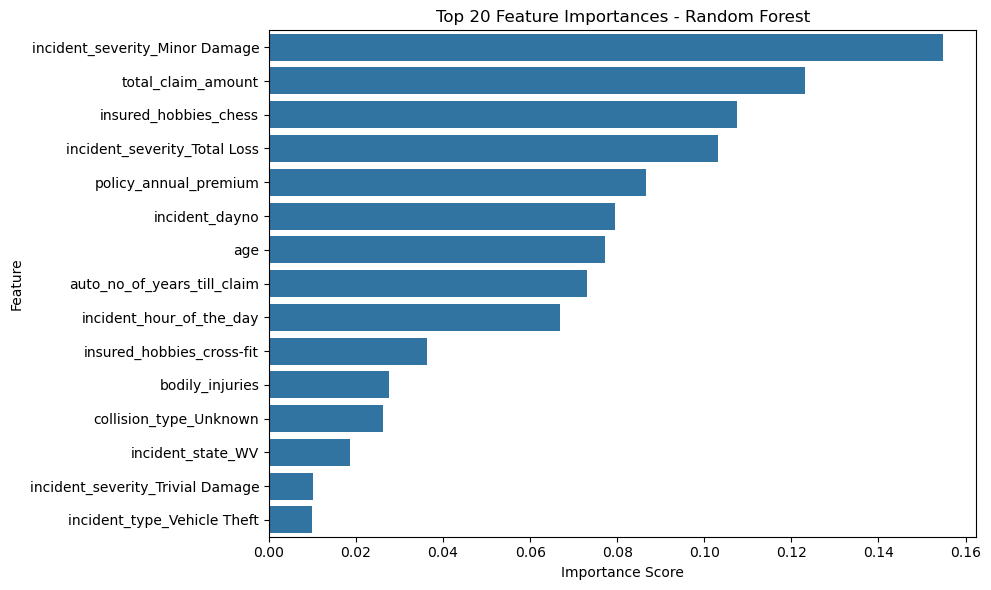

                             Feature  Importance
1     incident_severity_Minor Damage    0.154749
2                 total_claim_amount    0.123049
0              insured_hobbies_chess    0.107589
4       incident_severity_Total Loss    0.103087
8              policy_annual_premium    0.086533
5                     incident_dayno    0.079432
11                               age    0.077240
10       auto_no_of_years_till_claim    0.073112
7           incident_hour_of_the_day    0.066800
6          insured_hobbies_cross-fit    0.036311
14                   bodily_injuries    0.027476
3             collision_type_Unknown    0.026146
9                  incident_state_WV    0.018574
13  incident_severity_Trivial Damage    0.010077
12       incident_type_Vehicle Theft    0.009826


RandomForestClassifier(class_weight='balanced', min_samples_split=5,
                       random_state=42)

In [100]:
# Building random forest model based on results of hyperparameter tuning
print(grid_search.best_estimator_.feature_importances_)

feature_importance_df = pd.DataFrame({
    'Feature': X_train_selected.columns,
    'Importance': best_rf.feature_importances_
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
plt.title('Top 20 Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
print(feature_importance_df)
top_features = feature_importance_df.head(10)['Feature'].tolist()



X_train_selected = X_encoded[top_features]

best_rf.fit(X_train_selected, y_train_encoded)


#### **7.5.3** Make predictions on training data <font color = red>[1 Mark]</font>

In [101]:
y_train_pred = best_rf.predict(X_train_selected)

#### **7.5.4** Check accuracy of Random Forest Model <font color = red>[1 Mark]</font>

In [102]:
# Check the accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Training Accuracy:", accuracy_score(y_train_encoded, y_train_pred))

Training Accuracy: 0.9980988593155894


#### **7.5.5** Create confusion matrix <font color = red>[1 Mark]</font>

In [103]:
# Create the confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_train_encoded, y_train_pred))


Confusion Matrix:
 [[526   0]
 [  2 524]]


In [104]:
print("\nClassification Report:\n", classification_report(y_train_encoded, y_train_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       526
           1       1.00      1.00      1.00       526

    accuracy                           1.00      1052
   macro avg       1.00      1.00      1.00      1052
weighted avg       1.00      1.00      1.00      1052



#### **7.5.6** Create variables for true positive, true negative, false positive and false negative <font color = red>[1 Mark]</font>

In [105]:
cm = confusion_matrix(y_train_encoded, y_train_pred)

TN, FP, FN, TP = cm.ravel()

print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)


True Positives (TP): 524
True Negatives (TN): 526
False Positives (FP): 0
False Negatives (FN): 2


#### **7.5.7** Calculate sensitivity, specificity, precision, recall and F1-score of the model <font color = red>[3 Marks]</font>

In [106]:
# Calculate the sensitivity

sensitivity = TP / (TP + FN)
# Calculate the specificity
specificity = TN / (TN + FP)

# Calculate Precision
precision = TP / (TP + FP)

# Calculate Recall
recall = sensitivity

# Calculate F1-Score
f1 = 2 * (precision * sensitivity) / (precision + sensitivity)



print("Sensitivity (Recall):", round(sensitivity, 3))
print("Specificity:", round(specificity, 3))
print("Precision:", round(precision, 3))
print("F1 Score:", round(f1, 3))



Sensitivity (Recall): 0.996
Specificity: 1.0
Precision: 1.0
F1 Score: 0.998


## **8. Prediction and Model Evaluation** <font color = red>[20 marks]</font>
Use the model from the previous step to make predictions on the validation data with the optimal cutoff. Then evaluate the model's performance using metrics such as accuracy, sensitivity, specificity, precision, and recall.

### **8.1 Make predictions over validation data using logistic regression model** <font color = red>[10 marks]</font>

#### **8.1.1** Select relevant features for validation data and add constant <font color="red">[1 Mark]</font>

In [107]:
# Select the relevant features for validation data
X_test_final = X_test_encoded[col].drop(['csl_person','csl_accident'],axis=1)
# Add constant to X_validation
y_test_encoded

fraud_claim_Y
0                0
1                0
2                0
3                0
4                0
..             ...
295              0
296              1
297              0
298              0
299              0

[300 rows x 1 columns]

#### **8.1.2** Make predictions over validation data <font color="red">[1 Mark]</font>

In [108]:
# Make predictions on the validation data and store it in the variable 'y_validation_pred'
X_test_const = sm.add_constant(X_test_final)

y_test_pred = model3.predict(X_test_const)


#### **8.1.3** Create DataFrame with actual values and predicted values for validation data <font color="red">[2 Marks]</font>

In [109]:
#  Create DataFrame with actual values and predicted values for validation data
df_test_pred = pd.DataFrame({'actual_values':np.reshape(y_test_encoded,(300,)),'predicted_prob':y_test_pred})
df_test_pred

actual_values  predicted_prob
0                0        0.153641
1                0        0.153641
2                0        0.153641
3                0        0.094785
4                0        0.153641
..             ...             ...
295              0        0.974462
296              1        0.094785
297              0        0.153641
298              0        0.069500
299              0        0.153641

[300 rows x 2 columns]

#### **8.1.4** Make final prediction based on cutoff value <font color="red">[1 Mark]</font>

In [110]:
# Make final predictions on the validation data using the optimal cutoff
df_test_pred['final_prediction']=  df_test_pred['predicted_prob'].apply(lambda x : 1 if x>0.78 else 0)

#### **8.1.5** Check the accuracy of logistic regression model on validation data <font color="red">[1 Mark]</font>

In [111]:
# Check the accuracy
df_test_pred
metrics.accuracy_score(df_test_pred['actual_values'],df_test_pred['final_prediction'])

0.8266666666666667

#### **8.1.6** Create confusion matrix <font color="red">[1 Mark]</font>

In [112]:
# Create the confusion matrix
confusion = metrics.confusion_matrix(df_test_pred['actual_values'],df_test_pred['final_prediction'])

#### **8.1.7** Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [113]:
# Create variables for true positive, true negative, false positive and false negative
tp , tn , fp , fn = confusion.ravel()



#### **8.1.8** Calculate sensitivity, specificity, precision, recall and f1 score of the model <font color="red">[2 Marks]</font>

In [114]:
# Calculate the sensitivity
sesitivity = tp / (tp+fn)

# Calculate the specificity
specificity = tn / (tn+fp)

# Calculate Precision
Precision = tp / (tp+fp)

# Calculate Recall
recall = tp / (tp+fn)

# Calculate F1 Score
f1 = (2*Precision*recall)/(recall+Precision)
f1 , sesitivity , specificity , Precision , recall


(0.836283185840708,
 0.7620967741935484,
 0.7115384615384616,
 0.9264705882352942,
 0.7620967741935484)

### **8.2 Make predictions over validation data using random forest model** <font color = red>[10 marks]</font>

#### **8.2.1** Select the important features and make predictions over validation data <font color="red">[2 Marks]</font>

In [115]:
# Select the relevant features for validation data

# Make predictions on the validation data


y_test_pred_rf = best_rf.predict(X_test_encoded[top_features])

#### **8.2.2** Check accuracy of random forest model <font color="red">[1 Mark]</font>

In [116]:
# Check accuracy
print("Accuracy:", round(accuracy_score(y_test_encoded, y_test_pred_rf), 3))
y_test_encoded

Accuracy: 0.827


fraud_claim_Y
0                0
1                0
2                0
3                0
4                0
..             ...
295              0
296              1
297              0
298              0
299              0

[300 rows x 1 columns]

#### **8.2.3** Create confusion matrix <font color="red">[1 Mark]</font>

In [117]:
# Create the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test_encoded, y_test_pred_rf))

Confusion Matrix:
 [[194  32]
 [ 20  54]]


#### **8.2.4** Create variables for true positive, true negative, false positive and false negative <font color="red">[1 Mark]</font>

In [118]:
# Create variables for true positive, true negative, false positive and false negative
TN, FP, FN, TP = cm.ravel()

print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)


True Positives (TP): 524
True Negatives (TN): 526
False Positives (FP): 0
False Negatives (FN): 2


#### **8.2.5** Calculate sensitivity, specificity, precision, recall and F1-score of the model <font color="red">[5 Marks]</font>

In [119]:
# Calculate the sensitivity

sensitivity = TP / (TP + FN)
# Calculate the specificity
specificity = TN / (TN + FP)

# Calculate Precision
precision = TP / (TP + FP)

# Calculate Recall
recall = sensitivity

# Calculate F1-Score
f1 = 2 * (precision * sensitivity) / (precision + sensitivity)



print("Sensitivity (Recall):", round(sensitivity, 3))
print("Specificity:", round(specificity, 3))
print("Precision:", round(precision, 3))
print("F1 Score:", round(f1, 3))



Sensitivity (Recall): 0.996
Specificity: 1.0
Precision: 1.0
F1 Score: 0.998


## **Evaluation and Conclusion**
Deploy a hybrid fraud detection approach:
○ Use Logistic Regression for transparency and explainability
○ Use Random Forest for deeper pattern discovery in background scoring
● Continuously monitor and retrain models using new claim data
● Use top features to build real-time alerts or dashboards for fraud analysts
● Further explore model ensembling and cost-sensitive learning to better manage
false positives/negatives
